## preprocessing of Can Tho Dataset and compariosn with HCMC dataset
AIm: Valdiate that both datasets dont differ too much from each other, so that they can be compared with each other


In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""Data preprocessing for Can Tho survey dataset"""

__author__ = "Anna Buch, Heidelberg University"
__email__ = "a.buch@stud.uni-heidelberg.de"


import sys, os
import re
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


UTILS_PATH = os.path.join(os.path.abspath(""), "../", "utils")
sys.path.append(UTILS_PATH)
import settings as s

OUTPATH_FIGURES = Path("../figures_for_latex")


#s.init()
# seed = s.seed

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('use_inf_as_na', True)
plt.figure(figsize=(20, 10))



<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [2]:
## load DS for flood event from 2011 in CanTHo
#df_cantho = pd.read_excel("../input_survey_data/input_data_cantho_2013_quicktest.xlsx", header=0) # only pre-selected features
df_cantho_raw = pd.read_excel("../input_survey_data/input_data_cantho_2013_raw_no_multiheader.xlsx") # removed mulitple header rows

# ## load HCMC DS for flood events between 2010-2020
df_hcmc_rloss = pd.read_excel("../input_survey_data/input_data_contentloss_tueb.xlsx")
df_hcmc_bred = pd.read_excel("../input_survey_data/input_data_businessreduction_tueb.xlsx")

df_hcmc_bothtargets = pd.read_excel("../input_survey_data/input_data_bothtargets_tueb.xlsx")



In [3]:
df_cantho = df_cantho_raw

## missing values
df_cantho = df_cantho.replace({99.0: np.nan, 88.0: np.nan})

### rename columns 
rename cols to the ones used in HCMC ds

In [4]:

## assigne new columns which have to be created in this script, eg relative contnet loss
df_cantho["Target_relative_contentloss_euro"] = None
df_cantho["Target_contentloss_euro"] = None



col_names = {
       r'3.31$' : 'Target_eloss_VND', 
       r'^3.34$' : 'Target_gloss_VND', 
       r'3.40$' : 'Target_businessreduction',

       r'3.13.b$' : 'inundation_duration_day/month',
       r'3.13.c$' :'inundation_duration_hour/day',
       r'^3.12$' : 'water_depth_cm', 
       r'3.16$' : 'flowvelocity', 
       r'3.14$' : 'contaminations', 
       r'^2.2$' : 'flood_experience', 

       '3.7.' : 'emergency_measures', 
       '4.1.' : 'precautionary_measures',  
       # not incl pumping euqipmentn and saving of valuables, 
       # but incl cheap funriture and low-value usage

       r'7.3$' : 'bage', 
       r'11.8$' : 'b_area',
       r'11.9$' : 'floors',
       r'7.4$' : 'building_value_cat',
       '3.18.' : 'overall_problem_house',
       r'11.6$' : 'content_value_g_VND',
       r'11.7$' : 'content_value_e_VND',
                  #  "P1Q5.8.1":"shp_business_limitation_r",
                  #    "P1Q5.8.2":"shp_business_limitation_s", # needed for modelling monetary loss (abs. loss) of business reduction 

       r'11.2$' : 'shp_employees', 
       r'11.3.1$' : 'shp_avgmonthly_sale_VND', 
       r'10.5$' : 'hh_monthly_income_cat',
       r'11.5$' : 'shp_registered_capital_VND_cat', # 11.5.	How much did you pay for opening your shop


       ## further variables which might be intresting but not needed for feature selection
       r'^1.4$' : 'shp_sector',
       r'^3.2$' : 'flood_type',
       r'^3.5$' : 'warning_time_day',  # for HCMC Q1P2.9 wanring_time_hours
       r'3.9$' : 'effect_emergency_measures',
       r'3.32$' : 'replaced_cost_e',
       r'3.34$' : 'replaced_cost_g',

        # Risk perception and resilience
       r'^5.1$' : 'risk_future_flood',
       r'^5.2$' : 'risk_consequents_future_flood',
       r'4.9.1$' : 'perception_too_destructive_floods',  # NOTE == resilienceLeftAlone
       r'4.1.3' : 'resilience_joined_neighborhood_network', # 3 categories [Year	Before flood 2011	After flood 2011]
       r'6.1.1' : 'resilience_flood_management', # binary
       r'6.1.2' : 'resilience_govern_careing', # binary
       r'6.3$' : 'resilience_city_protection', # scaled [1-6]

       # '6.1' : 'resilience_govern_management',
       # '6.2' : 'perception_govern_increase_management',
       #'6.3' : 'perception_govern_protection', # is scaled 1-6
       #'resilience', 

       r'7.2$' : 'ownership',
       r'11.15$' : 'builing_elevation',
       'Type of house' : 'builing_type',
}

for k, v in col_names.items():
    df_cantho.rename(columns ={ i: re.sub(k, v, i) for i in  df_cantho.columns }, inplace=True )

## drop unneeded columns 
df_cantho = df_cantho[df_cantho.columns[ ~df_cantho.columns.str.match('^\d')]]


# target vars for relative and absolute costs on content loss [VND]
df_cantho.insert(0, "Target_eloss_VND", df_cantho.pop("Target_eloss_VND")) 
df_cantho.insert(1, "Target_gloss_VND", df_cantho.pop("Target_gloss_VND"))
df_cantho.insert(2, "Target_contentloss_euro", df_cantho.pop("Target_contentloss_euro"))
df_cantho.insert(3, "Target_relative_contentloss_euro", df_cantho.pop("Target_relative_contentloss_euro"))

# explanatory var: monthly reduction of business [%] 
df_cantho.insert(4, "Target_businessreduction", df_cantho.pop("Target_businessreduction"))  


df_cantho.columns[:]

Index(['Target_eloss_VND', 'Target_gloss_VND', 'Target_contentloss_euro',
       'Target_relative_contentloss_euro', 'Target_businessreduction',
       'shp_sector', 'flood_experience', 'flood_type', 'warning_time_day',
       'emergency_measures1', 'emergency_measures2', 'emergency_measures3',
       'emergency_measures4', 'emergency_measures5', 'emergency_measures6',
       'emergency_measures7', 'emergency_measures8', 'emergency_measures9',
       'effect_emergency_measures', 'water_depth_cm',
       'inundation_duration_day/month', 'inundation_duration_hour/day',
       'contaminations', 'flowvelocity', 'overall_problem_house1',
       'overall_problem_house2', 'overall_problem_house3',
       'overall_problem_house4', 'replaced_cost_e', 'precautionary_measures1',
       'precautionary_measures2', 'precautionary_measures3',
       'precautionary_measures4', 'precautionary_measures5',
       'precautionary_measures6', 'precautionary_measures7',
       'precautionary_measures8', 'pre

In [5]:
## NOTE resilience_flood_management == 6.1.1 is not binary (as in questionary.docx)
df_cantho_raw["6.1.1"].value_counts()
df_cantho.resilience_flood_management.value_counts()

resilience_flood_management
0.00    260
1.00    116
2.00      1
6.00      1
Name: count, dtype: int64

### Absolute content loss

In [6]:
## merge both absolute content loss targets
df_cantho["Target_contentloss_VND"]  = df_cantho.Target_eloss_VND + df_cantho.Target_gloss_VND
np.round(df_cantho["Target_contentloss_VND"], 2).describe()

## merge content values 
df_cantho["shp_content_value_VND"]  = df_cantho.content_value_g_VND + df_cantho.content_value_e_VND

df_cantho.drop(["Target_eloss_VND", "Target_gloss_VND", "content_value_g_VND", "content_value_e_VND"], axis=1, inplace=True)


### Hydrological variables


In [7]:
df_cantho["inundation_duration_h"] =  df_cantho["inundation_duration_hour/day"] # <<-- more similar to HCMC, than df_cantho["inundation_duration_day/month"] * inundation_duration_hour/day


## verify with HCMC
print("CanTHo", df_cantho.inundation_duration_h.describe(), "\n", "HCMC", df_hcmc_rloss.inundation_duration_h.describe())

# # water depth [cm]
print("CanTHo", df_cantho.water_depth_cm.describe(), "\n", "HCMC", df_hcmc_rloss.water_depth_cm.describe())
# median: 0.20cm, mean: 0.25m, max: 0.80m



CanTHo count   378.00
mean      4.33
std       3.40
min       1.00
25%       2.00
50%       4.00
75%       6.00
max      24.00
Name: inundation_duration_h, dtype: float64 
 HCMC count   312.00
mean     10.63
std      28.40
min       0.20
25%       2.00
50%       3.00
75%       6.00
max     240.00
Name: inundation_duration_h, dtype: float64
CanTHo count   378.00
mean     26.34
std      16.50
min       0.00
25%      12.75
50%      20.00
75%      40.00
max      80.00
Name: water_depth_cm, dtype: float64 
 HCMC count   317.00
mean     32.44
std      24.90
min       1.00
25%      10.00
50%      30.00
75%      50.00
max     150.00
Name: water_depth_cm, dtype: float64


In [8]:
## contamination
## rank contamination according to their occurence and damage potential: 0:no contamination, 1:light contamination and 2:heavy contamination

df_contaminations = df_cantho.filter(like="contaminations", axis=1)

df_cantho["contaminations"] = df_cantho["contaminations"].replace(
    {
    0.00 : 0, #  no contamination
    4.00 : 0, # no contamination  
    1.00 : 1, # light
    2.00 : 2,  # heavy
    3.00 : 2,  # heavy
    }
)
df_cantho.contaminations.value_counts()

contaminations
1.00    270
0.00    105
2.00      3
Name: count, dtype: int64

In [9]:
# assign according to HCMC distribution


## HCMC scales
# all_input.flood_experience = all_input.flood_experience.replace(
#     {
#       1:3,     # less than once a year , freq: 1
#       2:8,     # about once a year, freq: 14
#       3:16,      # twice a year, freq: 37
#       4:36,      # 4 times a year, freq: 58
#       5:76,      # 8 times a year, freq: 98
#       6:151     # around 15 times a year - used range 100-200, freq: 112 (more than 10 times a year, 100 times since 2010)
#     }
# )

## adapt to flood experience scales in HCMC
df_cantho.flood_experience = df_cantho.flood_experience.replace(
    {
        #  less than once a year doesnot exist in Can Tho
        1.0 : 8,    # once a year
        2.0 : 16,   # twice a year
        4.0 : 26,    # three times a year (doesnt exist for HCMC)
        4.0 : 36,   # 4 times a year
        5.0 : 76,    # More than four times a year
        # around 15 times a year does nto exist in cantho
    }
)
df_cantho.flood_experience.value_counts()


## TODOD  bag

flood_experience
76.00    194
8.00     132
16.00     18
36.00     18
3.00      16
Name: count, dtype: int64

In [10]:
## flowvelo

## Paprotny 2021:  As for flow velocity, the respondents assessed i based on a qualitative scale, 
# providing a value from 1 to 6, with half-points possible (Thieken et al. 2005). 
# A value of 0.1 m/s was assigned to each full step of this qualitative scale. 


## flowvelocity high depends on the exepience and Einschätzung of the intrviewee
## e.g. has the interviewee ever seen turbulent water
## still the variable shows the general characteristics, if flood water is fast or not
## Extrapolation: use fv as input and also for damage-funs(due that maybe most important var in FI) 
## - flowvelo is highly related to inundation duration --> from inundation duration possible to derive flovelo 

## adapt to v scales in HCMC
df_cantho.flowvelocity = df_cantho.flowvelocity.replace(        # 1 - 6 # calm - torrential
    {
        0 : np.nan,  
        1 : 0.1,  # calm
        2 : 0.1,  # calm
        3 : 0.2, 
        4 : 0.3, 
        5 : 0.4,
        6 : 0.5  # torrential
    }
)

#df_cantho.flowvelocity.value_counts()
df_cantho.flowvelocity.value_counts()


flowvelocity
0.40    146
0.50     88
0.30     72
0.20     59
0.10      9
Name: count, dtype: int64

### Building variables

In [11]:
df_cantho["building_value_mVND"] = df_cantho["building_value_cat"].replace(
    {
        1.0 : 2.5,
        2.0 : 7.5,
        3.0 : 15,
        4.0 : 35,
        5.0 : 75,
        6.0 : 150,
        7.0 : 350,
        8.0 : 750,
        9.0 : 1500,
        10.0 : 3500,
    }
)
df_cantho = df_cantho.drop("building_value_cat", axis=1)


In [12]:
## bv
# median: 75 mVND, mean: 75 mVND, max 3500 mVND
# print(df_cantho.floors.describe() ) # meaningless or only flat buildings (or count ground floor = 0, first level = 1 ?)
    
## fix floors :
## problably 0 : bungalow with only ground floor --> in HCMC would be this 1 floor
df_cantho["floors"] = df_cantho["floors"] +1 

## remove records with more than 3 floors
df_cantho = df_cantho.loc[df_cantho["floors"] <= 3, :]  # rm ~ 20 records



## verify with HCMC
print("CanTHo", df_cantho.floors.describe(), "\n", "HCMC: median and mean are at 2 floors ")



CanTHo count   355.00
mean      1.46
std       0.68
min       1.00
25%       1.00
50%       1.00
75%       2.00
max       3.00
Name: floors, dtype: float64 
 HCMC: median and mean are at 2 floors 


In [13]:
df_cantho["bage"].value_counts()

bage
6.00    116
5.00     93
4.00     62
3.00     32
2.00     28
1.00     16
7.00      6
0.00      1
Name: count, dtype: int64

In [14]:
# in HMCC oldest bui is around 90 to 100 years old

In [15]:
## bage
# convert fro mcategrical scale to relative scale with bage at time of flood event

# print(df_cantho["bage"].describe())

## repalce missing info
df_cantho.bage = df_cantho.bage.replace(0, np.nan)  # P4Q2.2: when was the house constructed [year]?
df_cantho.bage = df_cantho.bage.replace(1, np.nan)  # existent but not mention year

## categories --> continous scales [year]
df_cantho["bage"]  = df_cantho["bage"].replace(
    {
       # 1.0 : specific year,  # existent but not mention year
        2 : 1950,
        3 : 1965,
        4 : 1975,
        5 : 1985,
        6 : 1995,
        7 : 2003,
        #8 : 2010,  # not in repsonded in cantho survey
    }
)

flood_year = 2011  # year of flood event in Can Tho

# ## NOTE ["bage"] is here converted to relative scale: its then the b.age at the time of flood event
df_cantho["bage"] = flood_year - df_cantho.bage.astype("Int64")  # building age at time of flood event
df_cantho["bage"] = df_cantho["bage"].astype(float)

print(df_cantho["bage"].describe())

## --> most bui buid in 90s (and in 80s)


count   337.00
mean     28.88
std      13.81
min       8.00
25%      16.00
50%      26.00
75%      36.00
max      61.00
Name: bage, dtype: float64


### socio economic status
check if income , monthly sale etc is similar to the HCMC shophouses


In [16]:
df_cantho["hh_monthly_income_mVND"]  = df_cantho["hh_monthly_income_cat"].replace(
    {
        1.0 : 0.25,  # in mVND
        2.0 : 0.75,
        3.0 : 1.5,
        4.0 : 3.5,
        5.0 : 7.5,
        6.0 : 15,
        7.0 : 35,
        8.0 : 50,
    }
)

df_cantho.drop("hh_monthly_income_cat", axis=1, inplace=True)

In [17]:
# shp_registered_capital_VND

df_cantho["shp_registered_capital_mVND"]  = df_cantho["shp_registered_capital_VND_cat"].replace(
    {
        1.0 : 25,  # in mVND
        2.0 : 75,
        3.0 : 150,
        4.0 : 350,
        5.0 : 750,
        6.0 : 1500,
        7.0 : 3500,
    }
)

df_cantho.drop("shp_registered_capital_VND_cat", axis=1, inplace=True)
# df_cantho["shp_registered_capital_mVND"].describe()

## compared to HCMC
##  --> medians are similar, 1. and 3.Q: are also more or less similar when considering the categrical sturcutre for CanTho
## a bit too high values for CanTHo probably due to the categorical intervals were smallest registed captial value caputres most cases ,
# ## while for HCMC a continous scale was used in the questionary

In [18]:

df_cantho[["hh_monthly_income_mVND", "shp_employees", "shp_avgmonthly_sale_VND", "shp_registered_capital_mVND"]].describe()
# df_cantho[df_cantho.number_employees>=20]  # 5 businesses with more than 20 employees

## --> first keep also larger shops due that their absolute losses ae similar high aas for HCMC around 2500 €


,hh_monthly_income_mVND,shp_employees,shp_avgmonthly_sale_VND,shp_registered_capital_mVND
count,353.00,353.00,324.00,353.00
mean,6.73,2.05,14175925.93,77.05
std,7.44,3.14,48451182.93,296.99
min,0.25,1.00,300000.00,25.00
25%,3.50,1.00,2000000.00,25.00
50%,3.50,1.00,4000000.00,25.00
75%,7.50,2.00,10000000.00,25.00
max,50.00,37.00,600000000.00,3500.00


In [19]:
# df_cantho[df_cantho.number_employees>=20]  # 5 businesses with more than 20 employees

## --> first keep also larger shops due that their absolute losses ae similar high aas for HCMC around 2500 €

### Business-characteristics


In [20]:
## HCMC
# hh_income	[category]
# median 300 €, mean: 425 €, max: 3320 €

# number_employees	
# median: 2,  mean: 2,  max: 10

# shp_avg_monthly_sale
# median: 290 €, mean: 370 €, max: 2760 €



## Can Tho
# hh_income	[category]
# median: ~ 140€, mean 140€-380€, max > 2000€

# number_employees	
# median: 1 mean: 1,  max: 37

# shp_avg_monthly_sale [mVND]
# median: 192 €, mean: 1670 €, max: 346500 €

## --> surveyed people in CanTHo have smaller income than in HCMC --> TODO check ownership (more employee stauts than in HCMC ? )
## --> maybe remove shop in CanTho with many employees and high sale


## Indicators

In [21]:
## reset idnex to avoid problem when re-merging with indicators 
df_cantho = df_cantho.reset_index(drop=True)


In [22]:
## emergency

# df_cantho.emergency_measures1 - 9

## emergency measures as indicator : range: 0:no measures - 6: applied all measures 

pattern = [r"^emergency_measures.?"] 
pattern_cols = re.compile('|'.join(pattern))
df_emergency = df_cantho.filter(regex=pattern_cols, axis=1)
df_emergency

## create indicator as ratio between implemented and potentially implemented emergency measures
df_cantho["emergency_measures"] = None
df_cantho["emergency_measures"] = df_emergency.eq(1).sum(axis=1) / len(df_emergency.columns)

# keep only indicator in final df
df_cantho.drop(
    df_emergency.filter(
        regex=r"^(?:.+\d)$"
        ).columns, 
    axis=1, inplace=True
)
df_cantho.emergency_measures.describe()

count   355.00
mean      0.29
std       0.19
min       0.00
25%       0.11
50%       0.33
75%       0.44
max       0.89
Name: emergency_measures, dtype: float64

In [23]:
## overall_problem_house

## Cantho survey question
# 1: My house was collapsed or washed away 
# 2: My house was damage partly (specify)
# 3: My house was full of water which caused damage to the floor, walls, etc.


pattern = [r"overall_problem_house.(?<!4)$"] # get all columns but not overall_problem_house_r4: no problem/ problem 
pattern_cols = re.compile('|'.join(pattern))
df_problem_house = df_cantho.filter(regex=pattern_cols, axis=1)
df_problem_house.describe()

# ## create indicator (based on ranking scheme from HCMC)
df_cantho["overall_problem_house"] = None

idx = np.where(df_problem_house["overall_problem_house1"]==1)
df_cantho.overall_problem_house[idx[0].tolist()] = 6  # heavy building damage


idx = np.where(df_problem_house["overall_problem_house2"]==1)
df_cantho.overall_problem_house[idx[0].tolist()] = 4  # partly building damage

## fix typos in overall_problem_house3
df_problem_house["overall_problem_house3"] = df_problem_house["overall_problem_house3"].replace({10:1, 3:1})

idx = np.where(df_problem_house["overall_problem_house3"]==1)
df_cantho.overall_problem_house[idx[0].tolist()] = 3  # floor and wall damage


## keep only indicator in final df
df_cantho.drop(
    df_cantho.filter(regex=r"^overall_problem_house.$").columns,
    axis=1, inplace=True
)
print(df_cantho.columns)

Index(['Target_contentloss_euro', 'Target_relative_contentloss_euro',
       'Target_businessreduction', 'shp_sector', 'flood_experience',
       'flood_type', 'warning_time_day', 'effect_emergency_measures',
       'water_depth_cm', 'inundation_duration_day/month',
       'inundation_duration_hour/day', 'contaminations', 'flowvelocity',
       'replaced_cost_e', 'precautionary_measures1', 'precautionary_measures2',
       'precautionary_measures3', 'precautionary_measures4',
       'precautionary_measures5', 'precautionary_measures6',
       'precautionary_measures7', 'precautionary_measures8',
       'precautionary_measures9', 'precautionary_measures10',
       'perception_too_destructive_floods', 'risk_future_flood',
       'risk_consequents_future_flood', 'resilience_flood_management',
       'resilience_govern_careing', 'resilience_city_protection', 'ownership',
       'bage', 'shp_employees', 'shp_avgmonthly_sale_VND', 'b_area', 'floors',
       'builing_elevation', 'builing_type

In [24]:
# # # df_cantho.precautionary_measures1 - 10
# # #df_cantho.precautionary_measures1.value_counts()
# # df_precautionary.describe()

# pattern = [r"^precautionary_measures.*(?<![2,3])$"] # exclude information measures
# pattern_cols = re.compile('|'.join(pattern))
# df_precautionary = df_cantho.filter(regex=pattern_cols, axis=1)
# print(df_precautionary.columns)


In [25]:
## precaution measures 
# ## --> test first as seperate features to keep as much information as possible

pattern = [r"^precautionary_measures.*(?<![2,3])$"] # exclude information measures
pattern_cols = re.compile('|'.join(pattern))
df_precautionary = df_cantho.filter(regex=pattern_cols, axis=1)
# print(df_precautionary.columns)
df_precautionary.drop("precautionary_measures1", axis=1, inplace=True)


## fix typo
df_precautionary = df_precautionary.replace({40.00:np.nan})

# ## create ratio: 
df_precautionary = df_precautionary.replace(
    {
        4:1,
        3:1,    # impl before 
        2:1,    
        1:1,     
        0:0     # not at all  
    }
)
# ## devide into expensive and low cost precautionary measures due that expensive meausres seems to be better in flood-loss-reduction
df_precautionary_expensive = df_precautionary[["precautionary_measures9", "precautionary_measures10", "precautionary_measures7"]]
df_precautionary_low = df_precautionary.drop(["precautionary_measures9", "precautionary_measures10", "precautionary_measures7"], axis=1)



# create indicator as ratio between implemented and potentially implemented measures (in total 7 measures exist)
# range: 0.0: none measure were implemented before the flood event - 1.0: all potential measures were implemented before the reported flood
# --> splitting in low and expensive precaution measures reduces the importance of the feautres for the models remarkable
df_cantho["precautionary_measures_lowcost"] = None
df_cantho["precautionary_measures_lowcost"] = df_precautionary_low.sum(axis=1) / len(df_precautionary_low.columns)
df_cantho["precautionary_measures_expensive"] = None
df_cantho["precautionary_measures_expensive"] = df_precautionary_expensive.sum(axis=1) / len(df_precautionary_expensive.columns)


## keep only indicator in final df
df_cantho.drop(
    df_cantho.filter(regex=r"\d$").columns,
    # df_cantho.filter(regex=r"^precautionary_measures.$").columns,  # not caputere precuation_10
    axis=1, inplace=True
)
print(df_cantho.columns)


Index(['Target_contentloss_euro', 'Target_relative_contentloss_euro',
       'Target_businessreduction', 'shp_sector', 'flood_experience',
       'flood_type', 'warning_time_day', 'effect_emergency_measures',
       'water_depth_cm', 'inundation_duration_day/month',
       'inundation_duration_hour/day', 'contaminations', 'flowvelocity',
       'replaced_cost_e', 'perception_too_destructive_floods',
       'risk_future_flood', 'risk_consequents_future_flood',
       'resilience_flood_management', 'resilience_govern_careing',
       'resilience_city_protection', 'ownership', 'bage', 'shp_employees',
       'shp_avgmonthly_sale_VND', 'b_area', 'floors', 'builing_elevation',
       'builing_type', 'Direct_damage', 'Target_contentloss_VND',
       'shp_content_value_VND', 'inundation_duration_h', 'building_value_mVND',
       'hh_monthly_income_mVND', 'shp_registered_capital_mVND',
       'emergency_measures', 'overall_problem_house',
       'precautionary_measures_lowcost', 'precautionary

In [26]:
df_cantho[["precautionary_measures_lowcost", "precautionary_measures_expensive"]].describe()

## HCMC for both precautionary indicators
# keys stats are similar between both DS (similar mean and median ) 
## --> for CanTHo it seems that at least lesss often all types of low and expensive meausres were implemented compared to HCMC, but on average more than in HCMC (compare medians between both DS for low and expensive precautions)

,precautionary_measures_lowcost,precautionary_measures_expensive
count,355.00,355.00
mean,0.30,0.22
std,0.25,0.21
min,0.00,0.00
25%,0.00,0.00
50%,0.25,0.33
75%,0.50,0.33
max,1.00,0.67


In [27]:
# df_resilience.resilience_flood_management.value_counts()

# has one anser with 2 , and one reply with 6 
# --> seems like outliers whiche are removed or entire variable is not used in reslience indeicator due that its only binary

In [28]:
# ## resilience as indicator:
# ## 1 : strong disagree - 5 : strong agree


## select based on findings from PCA
# for HCMC DS: df_resilience = df_cantho[["resilience_city_protection", "resilience_govern_careing","resilience_neighbor_management"]]
# for CanTHo DS
df_resilience = df_cantho["resilience_city_protection"]
# df_resilience = df_cantho[["resilience_city_protection","resilience_flood_management", "resilience_govern_careing"]]
print(df_resilience.describe())

# convert binary resilience_govern_careing to scaled [1, 6]
# df_resilience["resilience_govern_careing"] = df_resilience["resilience_govern_careing"].replace({1:6, 0:1})


df_cantho["resilience"] = None
df_cantho["resilience"] = df_cantho["resilience_city_protection"] # only one variable is currently used
# df_cantho["resilience"] = df_resilience.sum(axis=1) / len(df_resilience.columns)
print(df_cantho["resilience"].value_counts())


# ## rather pessimistic resilience variables
# df_resilience_leftalone = df_cantho[["resilience_left_alone", "resilience_more_future_affected"]]
# print(df_resilience_leftalone.columns)



## keep only indicator in final df
# df_cantho.drop("perception_too_destructive_floods", axis=1, inplace=True)
df_cantho.drop(
    df_cantho.filter(like="resilience_").columns,
    axis=1, inplace=True
)
print(df_cantho.columns)
## 1: disagree, 5: agree


count   355.00
mean      2.78
std       1.63
min       0.00
25%       1.00
50%       2.00
75%       4.00
max       6.00
Name: resilience_city_protection, dtype: float64
resilience
1.00    109
2.00     72
5.00     54
3.00     52
4.00     47
6.00     20
0.00      1
Name: count, dtype: int64
Index(['Target_contentloss_euro', 'Target_relative_contentloss_euro',
       'Target_businessreduction', 'shp_sector', 'flood_experience',
       'flood_type', 'warning_time_day', 'effect_emergency_measures',
       'water_depth_cm', 'inundation_duration_day/month',
       'inundation_duration_hour/day', 'contaminations', 'flowvelocity',
       'replaced_cost_e', 'perception_too_destructive_floods',
       'risk_future_flood', 'risk_consequents_future_flood', 'ownership',
       'bage', 'shp_employees', 'shp_avgmonthly_sale_VND', 'b_area', 'floors',
       'builing_elevation', 'builing_type', 'Direct_damage',
       'Target_contentloss_VND', 'shp_content_value_VND',
       'inundation_duration_h', 'bu

In [29]:
# ## perception as indicator
# ## o	Orderer rank okay as long its  quantitative

# # Reduced /Porrer  -> 1
# # Maintained /Same  -> 2
# # Increased /Richer -> 3


# # ## based on findings from PCA
# # df_perception = df[["perception_govern_support_past", "perception_govern_support_future"]]
# # print(df_perception.columns)

# # df["perception"] = None
# # df["perception"] = df_perception.sum(axis=1) / len(df_perception.columns)

# ## keep only indicator in final df
# df.drop(
#     df.filter(like="perception_").columns, 
#     axis=1, inplace=True
# )



## Unify monetary values

In [30]:
# ## check for very small registered capital
# vars_money = df_cantho.filter(regex="_mVND", axis=1)
# try:
#     vars_money[vars_money.shp_registered_capital_mVND <=1.0]  # less than 40 euros
# except:
#     pass

###  Variables inflation corrected for 2020 (align with HCMC ds)

Survey as doen 2013 therefore all monetary variables need inflation corrected for the time period from 2013-2020 (reference year), except damage variables need to be inflation corrected from year of flood event (which was 2011) to price level of 2020. 


**Variables inflation corrected for year when survey was conducted**

- building_value_mVND	- price level for 2013 (year when survey was done)
- shp_building_value_mVND	- price level for 2013
- shp_content_value_VND	- price level for 2013
- shp_registered_capital_mVND  - price level for 2013
- hh_monthly_income_mVND     - continous [value ranges in mVND], # price level for 2013
- shp_avgmonthly_sale_VND   - continous [value ranges in mVND], # price level for 2013 


**Variables inflation corrected for flood year**
Damage variables ('Target_eloss_VND', 'Target_gloss_VND' -- merged in Target_contentloss_VND) need to be inflation corrected based on flood time which was 2011
- 'Target_contentloss_VND'  - price levels based on flood time (2011)



In [31]:
## check for very small registered capital
vars_money = df_cantho.filter(regex="_mVND", axis=1)


## covnert all columns with million VND --> VND

vars_money = np.where( (vars_money.values != np.nan),
            vars_money.values * 1000000, # convert to VND
            vars_money.values)

## rename columns
new_cols = df_cantho.filter(regex="_mVND", axis=1).columns.str.replace("_mVND", "_VND")
vars_money = pd.DataFrame(vars_money, columns=new_cols)
print(vars_money.columns)

df_cantho.drop( df_cantho.filter(regex="_mVND", axis=1).columns, axis=1, inplace=True)

Index(['building_value_VND', 'hh_monthly_income_VND',
       'shp_registered_capital_VND'],
      dtype='object')


In [32]:
## add remaining monetary variables
vars_money = pd.concat(
    [vars_money, 
    df_cantho[df_cantho.filter(regex="VND", axis=1).columns.tolist()]
    ], axis=1)
vars_money.columns  # sholuld all end with _VND (no _mVND)

Index(['building_value_VND', 'hh_monthly_income_VND',
       'shp_registered_capital_VND', 'shp_avgmonthly_sale_VND',
       'Target_contentloss_VND', 'shp_content_value_VND'],
      dtype='object')

*Conversion of VND to euro (or US$)*

Based on JRC, p.8 and Paprotny2018, eg.p245
The reported damage values have been converted to Euro using the the exchange rate for the year 2013 (mean annual value)

*Source:* 
- www.oanda.com/currency/historical-rates
-  www.ecb.europa.eu/stats/exchange/eurofxref/html/eurofxref-graph-idr.en.html


In [33]:
# # GDP deflator source : https://jp.tradingeconomics.com/vietnam/gdp-deflator
gdp_price_index_year_of_flood = 121.26  # 2011
gdp_price_index_year_of_survey = 140.91  # 2013
gdp_price_index_2020 = 163.58 # price level 2020 based on GDP-deflation

## exchange rate 
exchange_rate = 1 / 27155  # ~ 3.68e-05  dong-> euro in 2020 
## (based on https://www.oanda.com/currency-converter/de/?from=VND&to=EUR&amount=1 )

## set price index on flood-year - all records reference on the severe flood event in CanTHo in 2011
gdp_price_index_year_of_flood = np.full( vars_money.shape[0], gdp_price_index_year_of_flood, dtype=float) # flood cases are all from 2011 flood in CanTHo

## set price index on survey-year - 2013
gdp_price_index_year_of_survey = np.full( vars_money.shape[0], gdp_price_index_year_of_survey, dtype=float) 

## when different flood-years exist
# gdp_price_index_year = data_ip2["flood_year"].astype("Int64").map(gdp_price_index_year_of_issue)  # series of cpi for each year of flood event


*Inflation correction via GDP-deflator*


\begin{equation}
\begin{align*}

&uninflated_{2020} = losses_y * exchangerate_{2020} \\
&inflationrate = uninflated_{2020} * pindex_{2020} / pindex_y\\

\end{align*}
\end{equation}

where:
- losses_y : losses in VND for year y
- uninflated_{2020} : uninflated losses in euro for 2020
- exchangerate_{2020} : exchang erate for VND to euro in year 20202 
- pindex_{2020} : price index from GDP-deflator for 2020 
- pindex_y : price index from GDP-deflator in year y

Given that inflation is the percentage change in the overall price of an item in an economy, we can use the GDP deflator to calculate the inflation rate since its a measure of the price level.


*Further sources* \
*Paprotny 2018*: also used country-level GDP deflators for adjusting nominal to real losses in 2011 prices , p153, p244 \
*Sairam et al. 2020*


In [34]:
## GDP-deflator

vars_money["Target_contentloss_VND_gdp"] = None

##  only direct losses needs inflation correction in respect to flood time
for r in range(len(vars_money.Target_contentloss_VND)):

    ## exchange rate: convert VND in certain year to € in the same year
    uninflated_losses = (vars_money.Target_contentloss_VND[r] * exchange_rate) # get uninflated losses in euros for year 2020
    
    ## price index from GDP-deflator
    vars_money["Target_contentloss_VND_gdp"][r] = round(uninflated_losses * gdp_price_index_2020 / gdp_price_index_year_of_flood[r], 1)



# ##  for all other monetary continous vars: need exchange conversion and inflation correction for time period 2013 (year of survey) to 2020 (ref.year)
for c in vars_money.drop(["Target_contentloss_VND_gdp","Target_contentloss_VND"], axis=1).columns:
    vars_money[c] = vars_money[c].apply(pd.to_numeric)
    for r in range(len(vars_money[c])):
        ## exchange rate: convert VND_2020 to €_2020
        uninflated = round((vars_money[c][r] * exchange_rate), 1)#.astype(int) 
        ## price index from GDP-deflator
        vars_money[c][r] = round(uninflated  * gdp_price_index_2020 / gdp_price_index_year_of_survey[r], 1)




In [35]:

## rename columns
new_cols = vars_money.filter(regex="_VND", axis=1).columns.str.replace("_VND", "_euro")
vars_money.columns = new_cols
vars_money = vars_money.apply(pd.to_numeric)


In [36]:
# update all_input with unified and inflated currencies
df_cantho.drop(df_cantho.filter(regex=r"_mVND|_VND", axis=1).columns, axis=1, inplace=True) 
df_cantho = pd.concat([df_cantho, vars_money], axis=1)
df_cantho.drop("Target_contentloss_euro", axis=1, inplace=True)
df_cantho.rename(columns={"Target_contentloss_euro_gdp" : "Target_contentloss_euro"}, inplace=True)

df_cantho.filter(regex=r"euro|VND", axis=1).columns  # should be only euros


Index(['Target_relative_contentloss_euro', 'building_value_euro',
       'hh_monthly_income_euro', 'shp_registered_capital_euro',
       'shp_avgmonthly_sale_euro', 'shp_content_value_euro',
       'Target_contentloss_euro'],
      dtype='object')

In [37]:
df_cantho[["hh_monthly_income_euro", "shp_employees", "shp_avgmonthly_sale_euro", "shp_registered_capital_euro"]].describe()


,hh_monthly_income_euro,shp_employees,shp_avgmonthly_sale_euro,shp_registered_capital_euro
count,353.00,353.00,324.00,353.00
mean,287.67,2.05,606.05,3294.02
std,318.17,3.14,2071.30,12696.23
min,10.70,1.00,12.80,1068.70
25%,149.60,1.00,85.60,1068.70
50%,149.60,1.00,171.00,1068.70
75%,320.60,2.00,427.60,1068.70
max,2137.50,37.00,25650.20,149625.80


## Targets
### absolute loss and Target business reduction 

In [38]:
# absolute content loss
df_cantho["Target_contentloss_euro"].describe()


# Target business reduction
df_cantho["Target_businessreduction"].describe()


## verify with HCMC
print("*CanTHo*\n", (df_cantho.Target_contentloss_euro).describe(), "\n\n", "*HCMC*\n: median: 0€ , mean:131€, 3.Q:78€, max:2600 €")
## --> abs losses are very similar in both DS
## -->  very similar in all keys-statistics  in min-max, median :-) interesting that fraction of zero-loss records is similar high as in HCMC

## verify with HCMC
print("*CanTHo*\n", df_cantho.Target_businessreduction.describe(), "\n\n", "*HCMC*\n", df_hcmc_bred.Target_businessreduction.describe())
## --> business reduction differ quite much: between avg < 10% in reduction in HCMC and 40% in Can THo 
## --> might not good to enrich bred ds with CanTHo

*CanTHo*
 count    354.00
mean      91.42
std      196.81
min        0.00
25%        0.00
50%        9.90
75%       74.50
max     1490.30
Name: Target_contentloss_euro, dtype: float64 

 *HCMC*
: median: 0€ , mean:131€, 3.Q:78€, max:2600 €
*CanTHo*
 count   355.00
mean     40.58
std      22.09
min       0.00
25%      25.00
50%      40.00
75%      50.00
max     100.00
Name: Target_businessreduction, dtype: float64 

 *HCMC*
 count   361.00
mean     18.47
std      25.23
min       0.00
25%       0.00
50%      10.00
75%      30.00
max     100.00
Name: Target_businessreduction, dtype: float64


### content value
verify cv calculation for HCMC

In [39]:
## create content value

# print(df_cantho["shp_content_value_euro"].describe())


## Can Tho
# rloss : median: 0.01 , mean: max:
# CV: mean 3000 €, median: 300 € , max= 392 600 € (no inflation corrected)
print(df_cantho["shp_content_value_euro"].describe())  # in €

## make shp_cv as 1/4 of shp_bv
df_cantho["shp_content_value_euro_estimated"] = df_cantho["building_value_euro"] / df_cantho["floors"] * 0.25
# df_cantho["shp_content_value_euro_estimated"]  =  df_cantho["shp_content_value_euro_estimated"] 
df_cantho["shp_content_value_euro_estimated"].describe() # in €

df_cantho["shp_content_value_euro_estimated_nocorrection"] = df_cantho["building_value_euro"] / df_cantho["floors"]


## cv survey question
# median: 260 € , mean: 2000 €, max: 57 000

## cv self (bv / floors * 0.25)
# median: 330 € , mean: 1100 €, max: 33 250

## HCMC euros (inflation corrected) : median: 3203 €,  mean: 4359 €, 1Q:257 €, 3Q: 4603 €, max:46032 €

#####################################################################

## HCMC after cleaning:
# abs closs : median 0, 3.Quantile= 80 €, mean 130 €, max 2600 €
# rcloss : median mean = 0.0, max = 0.3
# bred [%] : mean: 18%, median: 9 %

## Can Tho after cleaning: (no inflation)
# rloss : median: 0.0 , mean: 0.05,  max: 0.48
# CV: median: 310 € ,  mean 3340 €, max: 392.610 € (no inflation corrected)
## Bred : mean 40%, median 40%

## TODO 
# DONE - from can tho remove rloss > 0.8 --> gets similar to HCMC with max=0.3 ?
# CURR other method to derive / verify CV for HCMC  --> source why Logitic Regression performed so bad 
# Bred is quite different between both DS --> idea: apply can tho DS only to estimate closs fraction ?, do extrapoltion only for closs (not for bred)
 
## HCMC
# Target_contentloss_euro	shp_content_value_euro	Target_relative_contentloss_euro	Target_businessreduction
# count	371.0	324.0	315.0	350.0
# mean	131.6	4359.2	0.0	    17.4
# std	336.1	4047.6	0.1	    24.1
# min	0.0	    257.8	0.0	    0.0
# 25%	0.0	    1841.3	0.0	    0.0
# 50%	0.0	    3203.8	0.0	    8.5
# 75%	77.9	4603.2	0.0	    30.0
# max	2615.6	46032.0	1.0	    100.0



count     351.00
mean     2151.40
std      6465.80
min         0.00
25%        80.20
50%       256.60
75%       983.30
max     64125.30
Name: shp_content_value_euro, dtype: float64


In [40]:
df_cantho.describe()

,Target_businessreduction,shp_sector,flood_experience,flood_type,warning_time_day,effect_emergency_measures,water_depth_cm,inundation_duration_day/month,inundation_duration_hour/day,contaminations,flowvelocity,replaced_cost_e,perception_too_destructive_floods,risk_future_flood,risk_consequents_future_flood,ownership,bage,shp_employees,b_area,floors,builing_elevation,builing_type,Direct_damage,inundation_duration_h,emergency_measures,precautionary_measures_lowcost,precautionary_measures_expensive,resilience,building_value_euro,hh_monthly_income_euro,shp_registered_capital_euro,shp_avgmonthly_sale_euro,shp_content_value_euro,Target_contentloss_euro,shp_content_value_euro_estimated,shp_content_value_euro_estimated_nocorrection
count,355.00,355.00,355.00,318.00,341.00,355.00,355.00,355.00,355.00,355.00,351.00,352.00,355.00,354.00,355.00,354.00,337.00,353.00,351.00,355.00,355.00,355.00,350.00,355.00,355.00,355.00,355.00,355.00,354.00,353.00,353.00,324.00,351.00,354.00,354.00,354.00
mean,40.58,2.71,43.79,1.91,3.83,3.72,26.95,8.25,4.30,0.72,0.37,386363.64,4.56,4.64,4.43,1.13,28.88,2.05,96.90,1.46,7.44,3.50,10537788.82,4.30,0.29,0.30,0.22,2.78,7668.47,287.67,3294.02,606.05,2151.40,91.42,1234.67,4938.67
std,22.09,1.71,33.10,0.88,5.73,1.34,16.47,4.46,3.46,0.47,0.11,1783059.37,1.39,1.41,1.24,0.36,13.81,3.14,160.73,0.68,23.67,0.77,20667197.06,3.46,0.19,0.25,0.21,1.63,20447.18,318.17,12696.23,2071.30,6465.80,196.81,2838.51,11354.04
min,0.00,1.00,3.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.10,0.00,1.00,1.00,0.00,0.00,8.00,1.00,8.00,1.00,-100.00,2.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,10.70,1068.70,12.80,0.00,0.00,0.00,0.00
25%,25.00,1.00,8.00,1.00,0.00,3.00,15.00,5.00,2.00,0.00,0.30,0.00,4.00,4.00,4.00,1.00,16.00,1.00,40.00,1.00,0.00,3.00,600000.00,2.00,0.11,0.00,0.00,1.00,641.30,149.60,1068.70,85.60,80.20,0.00,160.32,641.30
50%,40.00,2.00,76.00,2.00,3.00,4.00,20.00,7.00,3.00,1.00,0.40,0.00,5.00,5.00,5.00,1.00,26.00,1.00,64.00,1.00,0.00,4.00,3385000.00,3.00,0.33,0.25,0.33,2.00,3206.20,149.60,1068.70,171.00,256.60,9.90,374.07,1496.30
75%,50.00,4.00,76.00,3.00,4.00,5.00,40.00,10.00,6.00,1.00,0.40,0.00,6.00,6.00,5.00,1.00,36.00,2.00,100.00,2.00,20.00,4.00,12000000.00,6.00,0.44,0.50,0.33,4.00,6412.50,320.60,1068.70,427.60,983.30,74.50,1246.88,4987.53
max,100.00,6.00,76.00,3.00,40.00,6.00,80.00,30.00,24.00,2.00,0.50,20000000.00,6.00,6.00,6.00,3.00,61.00,37.00,2000.00,3.00,100.00,4.00,251000000.00,24.00,0.89,1.00,0.67,6.00,149625.80,2137.50,149625.80,25650.20,64125.30,1490.30,37406.45,149625.80


### Target relative closs

In [41]:
## cv from survey
df_cantho["Target_relative_contentloss_euro"] = df_cantho["Target_contentloss_euro"] / df_cantho["shp_content_value_euro"]
# set all zero-loss cases to 0
df_cantho = df_cantho.apply(pd.to_numeric)
df_cantho.Target_relative_contentloss_euro[df_cantho.Target_relative_contentloss_euro.isna()] = 0.0


## self calc cv
df_cantho["Target_relative_contentloss_euro_self"] = df_cantho["Target_contentloss_euro"] / df_cantho["shp_content_value_euro_estimated"]
# set all zero-loss cases to 0
df_cantho = df_cantho.apply(pd.to_numeric)
df_cantho.Target_relative_contentloss_euro_self[df_cantho.Target_relative_contentloss_euro_self.isna()] = 0.0


In [42]:
## rloss > cv
print("Records with relative content loss > total content value :", sum(df_cantho.Target_relative_contentloss_euro > 1.0) )
print("Records with self-calc. relative content loss > total content value :", sum(df_cantho.Target_relative_contentloss_euro_self > 1.0) )

## drop these records where rloss > cv
df_cantho = df_cantho.loc[~(df_cantho.Target_relative_contentloss_euro >= 1.0), :]
df_cantho = df_cantho.loc[~(df_cantho.Target_relative_contentloss_euro_self >= 1.0), :]


# ## drop these records where rloss > cv
# df_cantho = df_cantho.loc[~(df_cantho.Target_rcloss >= 0.5), :]

df_cantho[["Target_contentloss_euro", "Target_relative_contentloss_euro", "Target_relative_contentloss_euro_self", 
           "shp_content_value_euro", "shp_content_value_euro_estimated", "Target_businessreduction"]].describe()


Records with relative content loss > total content value : 15
Records with self-calc. relative content loss > total content value : 25


,Target_contentloss_euro,Target_relative_contentloss_euro,Target_relative_contentloss_euro_self,shp_content_value_euro,shp_content_value_euro_estimated,Target_businessreduction
count,320.00,321.00,321.00,317.00,320.00,321.00
mean,59.78,0.09,0.10,1991.30,1330.36,40.75
std,132.53,0.18,0.18,6389.48,2965.77,21.69
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,85.60,160.32,30.00
50%,3.75,0.00,0.00,256.60,400.77,40.00
75%,49.70,0.10,0.12,940.50,1335.94,50.00
max,993.60,1.00,0.93,64125.30,37406.45,100.00


**cv self** is similar to the cv from questionary, therefore remove later one and the **respective Target version for loss ratio derived from it**, to have common approach of cv estimation in both DS (HCMC, CanTho)

In [43]:
df_cantho = df_cantho.drop(["Target_relative_contentloss_euro"], axis=1) #, "shp_content_value_euro"], axis=1)
df_cantho.rename(columns={
    "Target_relative_contentloss_euro_self" : "Target_relative_contentloss_euro",
    "shp_content_value_euro": "shp_content_value_euro_obs",  # obs
    "shp_content_value_euro_estimated" : "shp_content_value_euro", # pred
    }, inplace=True)


In [44]:
# ## remove shp sector # due that no expalnation which category revers to which sector
# df_cantho.shp_sector.value_counts()


## Explore variable's key statistics - are they similar to HCMC ?


In [45]:
df_cantho.columns

Index(['Target_businessreduction', 'shp_sector', 'flood_experience',
       'flood_type', 'warning_time_day', 'effect_emergency_measures',
       'water_depth_cm', 'inundation_duration_day/month',
       'inundation_duration_hour/day', 'contaminations', 'flowvelocity',
       'replaced_cost_e', 'perception_too_destructive_floods',
       'risk_future_flood', 'risk_consequents_future_flood', 'ownership',
       'bage', 'shp_employees', 'b_area', 'floors', 'builing_elevation',
       'builing_type', 'Direct_damage', 'inundation_duration_h',
       'emergency_measures', 'overall_problem_house',
       'precautionary_measures_lowcost', 'precautionary_measures_expensive',
       'resilience', 'building_value_euro', 'hh_monthly_income_euro',
       'shp_registered_capital_euro', 'shp_avgmonthly_sale_euro',
       'shp_content_value_euro_obs', 'Target_contentloss_euro',
       'shp_content_value_euro',
       'shp_content_value_euro_estimated_nocorrection',
       'Target_relative_contentloss

In [46]:
# df_cantho = df_cantho.drop([
#     'inundation_duration_day/month', 'inundation_duration_hour/day',
#     'flood_type', 
#     "shp_sector",  # have currently no information about category description
#     "ownership",
#     "Direct_damage", 
#     "warning_time_day", "effect_emergency_measures", "replaced_cost_e",
#     "perception_too_destructive_floods", 'risk_future_flood', 'risk_consequents_future_flood',
#     'floors', 'builing_elevation', 'builing_type', 
#     'overall_problem_house', 'building_value_euro', 
#     "hh_monthly_income_euro", "shp_registered_capital_euro", # not used in HCMC ds due to correlation with monthly_sale

#     #"No", "Year", "floors", "distance_to_river",

#     ], axis=1
# )
# df_cantho.columns

In [47]:
# df_cantho.info()
# df_cantho.columns

### missing data

In [48]:
## delete features with more than 10% missing values
print("Percentage of missing values per feature [%]\n", round(df_cantho.isna().mean().sort_values(ascending=False)[:15]  * 100), 2) 


Percentage of missing values per feature [%]
 overall_problem_house         30.00
flood_type                    11.00
shp_avgmonthly_sale_euro       9.00
bage                           5.00
warning_time_day               4.00
Direct_damage                  2.00
b_area                         1.00
shp_content_value_euro_obs     1.00
flowvelocity                   1.00
replaced_cost_e                1.00
shp_employees                  1.00
hh_monthly_income_euro         1.00
shp_registered_capital_euro    1.00
risk_future_flood              0.00
building_value_euro            0.00
dtype: float64 2


## Microbusinesses

In [49]:
print("Businees which are not micro businesses (> 10 employees)", len(df_cantho.loc[df_cantho.shp_employees >= 10, :]))
df_cantho = df_cantho.loc[df_cantho.shp_employees < 10, :]

Businees which are not micro businesses (> 10 employees) 6


## single dataset for bred and rloss

In [50]:
# df_cantho.rename(columns={
#     "shp_avgmonthly_sale_euro": "shp_avgmonthly_sale_euro",
# }, inplace=True)
df_cantho.shape

(313, 38)

In [51]:
## make to same unit as Bred
df_cantho["Target_relative_contentloss_euro"] = df_cantho["Target_relative_contentloss_euro"] * 100


df_cantho_rloss = df_cantho
df_cantho_rloss = df_cantho_rloss.drop(
    [
   # "Target_contentloss_euro",  # keep to calc abs losses
    "Target_businessreduction",
    # "shp_content_value_euro",  # keep to estimate abs loss after BN
    ]
    , axis=1)
print(df_cantho_rloss.shape)
df_cantho_rloss.columns


(313, 37)


Index(['shp_sector', 'flood_experience', 'flood_type', 'warning_time_day',
       'effect_emergency_measures', 'water_depth_cm',
       'inundation_duration_day/month', 'inundation_duration_hour/day',
       'contaminations', 'flowvelocity', 'replaced_cost_e',
       'perception_too_destructive_floods', 'risk_future_flood',
       'risk_consequents_future_flood', 'ownership', 'bage', 'shp_employees',
       'b_area', 'floors', 'builing_elevation', 'builing_type',
       'Direct_damage', 'inundation_duration_h', 'emergency_measures',
       'overall_problem_house', 'precautionary_measures_lowcost',
       'precautionary_measures_expensive', 'resilience', 'building_value_euro',
       'hh_monthly_income_euro', 'shp_registered_capital_euro',
       'shp_avgmonthly_sale_euro', 'shp_content_value_euro_obs',
       'Target_contentloss_euro', 'shp_content_value_euro',
       'shp_content_value_euro_estimated_nocorrection',
       'Target_relative_contentloss_euro'],
      dtype='object')

In [52]:
df_cantho_bred = df_cantho
df_cantho_bred = df_cantho_bred.drop(
    [
    "Target_contentloss_euro",
    "Target_relative_contentloss_euro"
    ],
    axis=1)

print(df_cantho_bred.shape)
df_cantho_bred.columns

(313, 36)


Index(['Target_businessreduction', 'shp_sector', 'flood_experience',
       'flood_type', 'warning_time_day', 'effect_emergency_measures',
       'water_depth_cm', 'inundation_duration_day/month',
       'inundation_duration_hour/day', 'contaminations', 'flowvelocity',
       'replaced_cost_e', 'perception_too_destructive_floods',
       'risk_future_flood', 'risk_consequents_future_flood', 'ownership',
       'bage', 'shp_employees', 'b_area', 'floors', 'builing_elevation',
       'builing_type', 'Direct_damage', 'inundation_duration_h',
       'emergency_measures', 'overall_problem_house',
       'precautionary_measures_lowcost', 'precautionary_measures_expensive',
       'resilience', 'building_value_euro', 'hh_monthly_income_euro',
       'shp_registered_capital_euro', 'shp_avgmonthly_sale_euro',
       'shp_content_value_euro_obs', 'shp_content_value_euro',
       'shp_content_value_euro_estimated_nocorrection'],
      dtype='object')

In [53]:
df_cantho_rloss.insert(0, "Target_relative_contentloss_euro", df_cantho_rloss.pop("Target_relative_contentloss_euro"))
df_cantho_bred.insert(0, "Target_businessreduction", df_cantho_bred.pop("Target_businessreduction"))

df_cantho_rloss.describe()


,Target_relative_contentloss_euro,shp_sector,flood_experience,flood_type,warning_time_day,effect_emergency_measures,water_depth_cm,inundation_duration_day/month,inundation_duration_hour/day,contaminations,flowvelocity,replaced_cost_e,perception_too_destructive_floods,risk_future_flood,risk_consequents_future_flood,ownership,bage,shp_employees,b_area,floors,builing_elevation,builing_type,Direct_damage,inundation_duration_h,emergency_measures,overall_problem_house,precautionary_measures_lowcost,precautionary_measures_expensive,resilience,building_value_euro,hh_monthly_income_euro,shp_registered_capital_euro,shp_avgmonthly_sale_euro,shp_content_value_euro_obs,Target_contentloss_euro,shp_content_value_euro,shp_content_value_euro_estimated_nocorrection
count,313.00,313.00,313.00,279.00,299.00,313.00,313.00,313.00,313.00,313.00,310.00,310.00,313.00,312.00,313.00,312.00,297.00,313.00,310.00,313.00,313.00,313.00,308.00,313.00,313.00,222.00,313.00,313.00,313.00,312.00,312.00,312.00,287.00,310.00,312.00,312.00,312.00
mean,9.66,2.59,42.23,1.89,3.70,3.71,26.43,8.36,4.33,0.72,0.36,214516.13,4.53,4.65,4.44,1.13,28.95,1.68,96.52,1.45,7.59,3.52,10006253.53,4.33,0.29,3.06,0.30,0.23,2.75,7924.20,268.92,3100.02,475.68,1751.50,53.10,1263.99,5055.98
std,17.94,1.66,33.20,0.88,5.61,1.35,16.07,4.59,3.41,0.47,0.11,961162.79,1.43,1.40,1.23,0.37,14.15,1.22,166.77,0.66,23.82,0.75,21281879.92,3.41,0.19,0.33,0.25,0.21,1.62,21294.29,283.96,12899.02,1688.91,5918.43,115.44,2857.55,11430.20
min,0.00,1.00,3.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.10,0.00,1.00,1.00,0.00,0.00,8.00,1.00,9.00,1.00,-100.00,2.00,0.00,1.00,0.00,3.00,0.00,0.00,0.00,0.00,10.70,1068.70,12.80,0.00,0.00,0.00,0.00
25%,0.00,1.00,8.00,1.00,0.00,3.00,15.00,5.00,2.00,0.00,0.30,0.00,4.00,4.00,4.00,1.00,16.00,1.00,40.00,1.00,0.00,3.00,500000.00,2.00,0.11,3.00,0.00,0.00,1.00,641.30,149.60,1068.70,85.60,85.60,0.00,160.32,641.30
50%,0.00,2.00,36.00,2.00,3.00,4.00,20.00,7.00,4.00,1.00,0.40,0.00,5.00,5.00,5.00,1.00,26.00,1.00,65.50,1.00,0.00,4.00,3000000.00,4.00,0.33,3.00,0.25,0.33,2.00,3206.20,149.60,1068.70,171.00,256.60,0.00,400.77,1603.10
75%,10.61,4.00,76.00,3.00,4.00,5.00,40.00,10.00,6.00,1.00,0.40,0.00,6.00,6.00,5.00,1.00,36.00,2.00,100.00,2.00,20.00,4.00,10637500.00,6.00,0.44,3.00,0.50,0.33,4.00,6412.50,320.60,1068.70,384.70,880.65,49.70,1246.88,4987.53
max,92.95,6.00,76.00,3.00,40.00,6.00,80.00,30.00,24.00,2.00,0.50,12000000.00,6.00,6.00,6.00,3.00,61.00,8.00,2000.00,3.00,100.00,4.00,251000000.00,24.00,0.89,6.00,1.00,0.67,6.00,149625.80,2137.50,149625.80,25650.20,64125.30,993.60,37406.45,149625.80


In [54]:
import os
os.getcwd()

'c:\\Users\\Anna\\Documents\\UNI\\MA_topic\\flood-loss-models-4-HCMC\\explorative-data-analysis'

### Verify estimation of CV by error rate of estimated CV and obs. Cv in Can THo

In [55]:
os.getcwd()

'c:\\Users\\Anna\\Documents\\UNI\\MA_topic\\flood-loss-models-4-HCMC\\explorative-data-analysis'

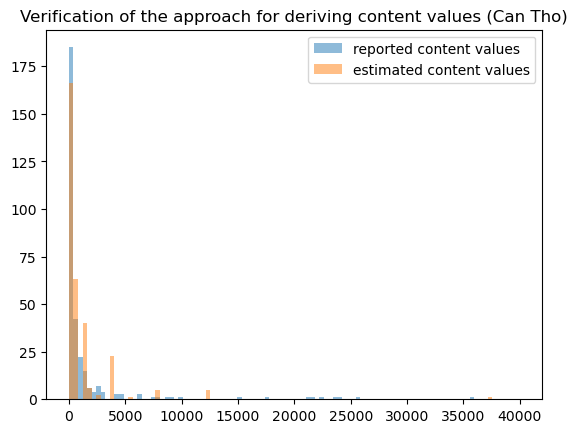

<Figure size 640x480 with 0 Axes>

In [56]:
bins = np.linspace(0, 40000, 100)

plt.hist((df_cantho.shp_content_value_euro_obs), bins, alpha=0.5, label='reported content values' )
# plt.hist((df_cantho.shp_content_value_euro_estimated_nocorrection), bins, alpha=0.5, label='estimated not corrected')
plt.hist((df_cantho.shp_content_value_euro), bins, alpha=0.5, label='estimated content values')
plt.legend(loc='upper right')
plt.title("Verification of the approach for deriving content values (Can Tho)")
#plt.ylim(0, 80)
plt.show()


plt.savefig( OUTPATH_FIGURES / "histo_estimation_contentvalues.png", dpi=300, bbox_inches="tight")  #format='jpg'



       cv_true   cv_pred  cv_residual_notcorr
count   312.00    312.00               312.00
mean   1263.99   5055.98              3791.98
std    2857.55  11430.20              8572.65
min       0.00      0.00                 0.00
25%     160.32    641.30               480.97
50%     400.77   1603.10              1202.32
75%    1246.88   4987.53              3740.65
max   37406.45 149625.80            112219.35


<Axes: xlabel='cv_residual_notcorr'>

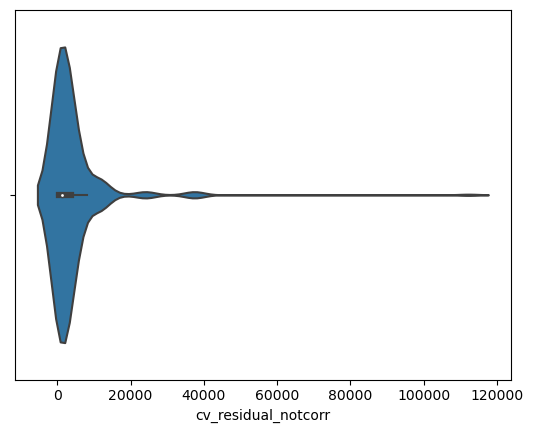

In [57]:
df_cv_residuals = pd.DataFrame(
    {
        "cv_true": df_cantho["shp_content_value_euro"],
        "cv_pred": df_cantho["shp_content_value_euro_estimated_nocorrection"],
        "cv_residual_notcorr": df_cantho["shp_content_value_euro_estimated_nocorrection"] - df_cantho_rloss["shp_content_value_euro"],
    }
)
print(df_cv_residuals.describe())

import seaborn as sns

sns.violinplot(data=df_cv_residuals, x="cv_residual_notcorr", split=True)#, inner="quart")#,split=True, gap=.1, inner="quart")#, inner="stick")
# plt.xlim(-10000, 10000)

In [58]:
df_cantho_rloss.columns

Index(['Target_relative_contentloss_euro', 'shp_sector', 'flood_experience',
       'flood_type', 'warning_time_day', 'effect_emergency_measures',
       'water_depth_cm', 'inundation_duration_day/month',
       'inundation_duration_hour/day', 'contaminations', 'flowvelocity',
       'replaced_cost_e', 'perception_too_destructive_floods',
       'risk_future_flood', 'risk_consequents_future_flood', 'ownership',
       'bage', 'shp_employees', 'b_area', 'floors', 'builing_elevation',
       'builing_type', 'Direct_damage', 'inundation_duration_h',
       'emergency_measures', 'overall_problem_house',
       'precautionary_measures_lowcost', 'precautionary_measures_expensive',
       'resilience', 'building_value_euro', 'hh_monthly_income_euro',
       'shp_registered_capital_euro', 'shp_avgmonthly_sale_euro',
       'shp_content_value_euro_obs', 'Target_contentloss_euro',
       'shp_content_value_euro',
       'shp_content_value_euro_estimated_nocorrection'],
      dtype='object')

       cv_true  cv_pred  cv_residual
count   310.00   312.00       309.00
mean   1751.50  1263.99      -482.73
std    5918.43  2857.55      5773.47
min       0.00     0.00    -58781.53
25%      85.60   160.32      -216.53
50%     256.60   400.77        96.12
75%     880.65  1246.88       651.95
max   64125.30 37406.45     27573.85


(-10000.0, 10000.0)

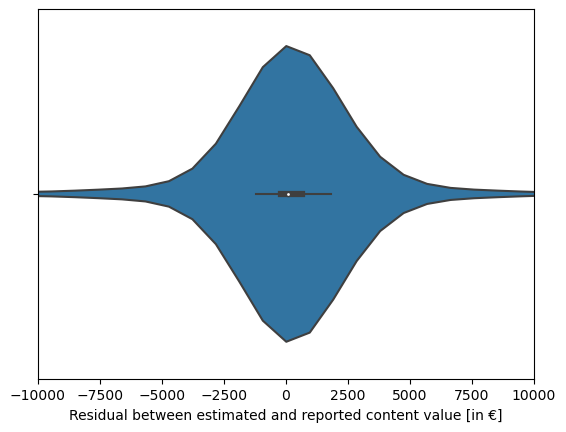

In [59]:
df_cv_residuals = pd.DataFrame(
    {
        "cv_true": df_cantho_rloss["shp_content_value_euro_obs"],
        "cv_pred": df_cantho_rloss["shp_content_value_euro"],
        "cv_residual": df_cantho_rloss["shp_content_value_euro"] - df_cantho_rloss["shp_content_value_euro_obs"],
    }
)
print(df_cv_residuals.describe())

import seaborn as sns

sns.violinplot(data=df_cv_residuals, x="cv_residual", split=True)#, inner="quart")#,split=True, gap=.1, inner="quart")#, inner="stick")
# plt.semilogx(df_cv_residuals.cv_residual)
# semilogx([x], y, [fmt], data=None, **kwargs)
# semilogx([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
# formatter = ticker.FuncFormatter(lambda y, _: f'{y:.3g}')
# ax.xaxis.set_major_formatter(formatter)
plt.xlabel("Residual between estimated and reported content value [in €]")
plt.xlim(-10000, 10000)

# around 50% of records have an underestimation of 300€ or overestimation of less than 500€, median is ~60€



In [60]:
print(df_cv_residuals.loc[df_cv_residuals.cv_residual < 2000, : ].shape)

df_cv_residuals

(282, 3)


,cv_true,cv_pred,cv_residual
0,85.60,80.16,-5.44
1,4702.50,3740.65,-961.85
2,106.90,40.08,-66.83
3,171.00,801.55,630.55
4,427.60,4007.84,3580.24
...,...,...,...
350,42.70,1603.12,1560.42
351,128.30,374.07,245.77
352,NaN,374.07,NaN
353,342.00,1603.12,1261.12


## Major cleaning 
Drop variables which are not in HCMC ds

In [61]:
df_cantho_rloss = df_cantho_rloss[df_hcmc_rloss.drop(["geometry", "shp_business_limitation"], axis=1).columns] # cantho has no GPS-information
df_cantho_bred = df_cantho_bred[df_hcmc_bred.drop(["geometry", "shp_business_limitation"], axis=1).columns]

print(df_cantho_rloss.columns, "\n", df_cantho_bred.columns)

Index(['Target_relative_contentloss_euro', 'Target_contentloss_euro',
       'inundation_duration_h', 'water_depth_cm', 'contaminations',
       'flowvelocity', 'flood_experience', 'bage', 'b_area', 'shp_sector',
       'hh_monthly_income_euro', 'emergency_measures', 'shp_employees',
       'precautionary_measures_lowcost', 'precautionary_measures_expensive',
       'resilience', 'shp_content_value_euro', 'shp_avgmonthly_sale_euro'],
      dtype='object') 
 Index(['Target_businessreduction', 'inundation_duration_h', 'water_depth_cm',
       'contaminations', 'flowvelocity', 'flood_experience', 'bage', 'b_area',
       'shp_sector', 'hh_monthly_income_euro', 'emergency_measures',
       'shp_employees', 'precautionary_measures_lowcost',
       'precautionary_measures_expensive', 'resilience',
       'shp_content_value_euro', 'shp_avgmonthly_sale_euro'],
      dtype='object')


## Merge with HCMC dataset

In [62]:
# common_cols_rloss = list(set.intersection(*(set(df.columns) for df in [df_hcmc_rloss, df_cantho_rloss])))
# common_cols_bred = list(set.intersection(*(set(df.columns) for df in [df_hcmc_bred, df_cantho_bred])))

# df_rloss_joined = pd.concat([df[common_cols_rloss] for df in [df_hcmc_rloss, df_cantho_rloss]], ignore_index=True)
# df_bred_joined = pd.concat([df[common_cols_bred] for df in [df_hcmc_bred, df_cantho_bred]], ignore_index=True)


# print(df_rloss_joined.shape)
# df_rloss_joined.head(3)   # not containing HCMCs shp_sector, 'resilience', 'resilienceLeftAlone',

# print(df_bred_joined.shape)
# df_bred_joined.head(3)   # not containing HCMCs shp_sector, 'resilience', 'resilienceLeftAlone',

In [63]:
# df_hcmc_rloss.columns

In [64]:
# df_cantho.Target_contentloss_euro.describe()

# ## Test if also removing high abs losses imporves Logistic Reg (HCMC: rm 4 highest abs losses)
# print("Absolute loss higher than 500€: ", len(df_cantho.Target_contentloss_euro>500.0))
# df_cantho = df_cantho.loc[ ~(df_cantho.Target_contentloss_euro>500.0), :]
# df_cantho.Target_contentloss_euro.describe()


In [65]:
df_cantho_bred.describe()

,Target_businessreduction,inundation_duration_h,water_depth_cm,contaminations,flowvelocity,flood_experience,bage,b_area,shp_sector,hh_monthly_income_euro,emergency_measures,shp_employees,precautionary_measures_lowcost,precautionary_measures_expensive,resilience,shp_content_value_euro,shp_avgmonthly_sale_euro
count,313.00,313.00,313.00,313.00,310.00,313.00,297.00,310.00,313.00,312.00,313.00,313.00,313.00,313.00,313.00,312.00,287.00
mean,40.86,4.33,26.43,0.72,0.36,42.23,28.95,96.52,2.59,268.92,0.29,1.68,0.30,0.23,2.75,1263.99,475.68
std,21.85,3.41,16.07,0.47,0.11,33.20,14.15,166.77,1.66,283.96,0.19,1.22,0.25,0.21,1.62,2857.55,1688.91
min,0.00,1.00,0.00,0.00,0.10,3.00,8.00,9.00,1.00,10.70,0.00,1.00,0.00,0.00,0.00,0.00,12.80
25%,25.00,2.00,15.00,0.00,0.30,8.00,16.00,40.00,1.00,149.60,0.11,1.00,0.00,0.00,1.00,160.32,85.60
50%,40.00,4.00,20.00,1.00,0.40,36.00,26.00,65.50,2.00,149.60,0.33,1.00,0.25,0.33,2.00,400.77,171.00
75%,50.00,6.00,40.00,1.00,0.40,76.00,36.00,100.00,4.00,320.60,0.44,2.00,0.50,0.33,4.00,1246.88,384.70
max,100.00,24.00,80.00,2.00,0.50,76.00,61.00,2000.00,6.00,2137.50,0.89,8.00,1.00,0.67,6.00,37406.45,25650.20


### Plot distribution cantho and hcmc

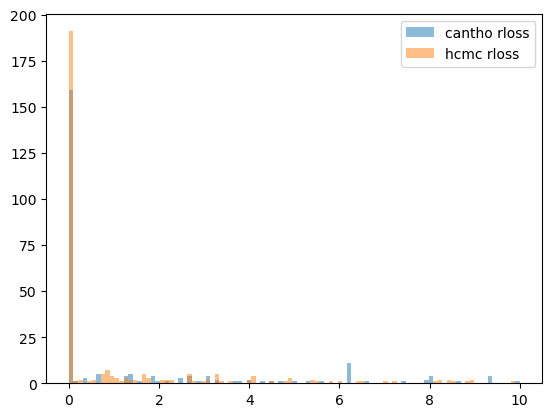

In [66]:
bins = np.linspace(0, 10, 100)

plt.hist((df_cantho.Target_relative_contentloss_euro), bins, alpha=0.5, label='cantho rloss')
plt.hist((df_hcmc_rloss.Target_relative_contentloss_euro), bins, alpha=0.5, label='hcmc rloss')
plt.legend(loc='upper right')
plt.show()

## --> with removing 4 highest abs loss in HCMC and similar much in CanTho


## Write to disk

In [67]:

# df_cantho_rloss
df_cantho_bred.describe()

,Target_businessreduction,inundation_duration_h,water_depth_cm,contaminations,flowvelocity,flood_experience,bage,b_area,shp_sector,hh_monthly_income_euro,emergency_measures,shp_employees,precautionary_measures_lowcost,precautionary_measures_expensive,resilience,shp_content_value_euro,shp_avgmonthly_sale_euro
count,313.00,313.00,313.00,313.00,310.00,313.00,297.00,310.00,313.00,312.00,313.00,313.00,313.00,313.00,313.00,312.00,287.00
mean,40.86,4.33,26.43,0.72,0.36,42.23,28.95,96.52,2.59,268.92,0.29,1.68,0.30,0.23,2.75,1263.99,475.68
std,21.85,3.41,16.07,0.47,0.11,33.20,14.15,166.77,1.66,283.96,0.19,1.22,0.25,0.21,1.62,2857.55,1688.91
min,0.00,1.00,0.00,0.00,0.10,3.00,8.00,9.00,1.00,10.70,0.00,1.00,0.00,0.00,0.00,0.00,12.80
25%,25.00,2.00,15.00,0.00,0.30,8.00,16.00,40.00,1.00,149.60,0.11,1.00,0.00,0.00,1.00,160.32,85.60
50%,40.00,4.00,20.00,1.00,0.40,36.00,26.00,65.50,2.00,149.60,0.33,1.00,0.25,0.33,2.00,400.77,171.00
75%,50.00,6.00,40.00,1.00,0.40,76.00,36.00,100.00,4.00,320.60,0.44,2.00,0.50,0.33,4.00,1246.88,384.70
max,100.00,24.00,80.00,2.00,0.50,76.00,61.00,2000.00,6.00,2137.50,0.89,8.00,1.00,0.67,6.00,37406.45,25650.20


In [68]:
# only for CanTHo
df_cantho_rloss.to_excel("../input_survey_data/input_data_contentloss_cantho.xlsx", index=False)
df_cantho_bred.to_excel("../input_survey_data/input_data_businessreduction_cantho.xlsx", index=False)

In [69]:
# df_rloss_joined.insert(0, "Target_relative_contentloss_euro", df_rloss_joined.pop("Target_relative_contentloss_euro"))
# df_bred_joined.insert(0, "Target_businessreduction", df_bred_joined.pop("Target_businessreduction"))

# df_rloss_joined.describe()


In [70]:
# ## save to disk

# # combined for HCMC and CanTHo
# df_rloss_joined.to_excel("../input_survey_data/input_data_contentloss_tueb_cantho.xlsx", index=False)
# df_bred_joined.to_excel("../input_survey_data/input_data_businessreduction_tueb_cantho.xlsx", index=False)

In [71]:
# print("Relative content loss dataset")
# print("Number of candidate predictors ", df_rloss_joined.shape[1])
# print("Number of cases ", df_rloss_joined.shape[0])

# print("\nBusiness reduction dataset")
# print("Number of candidate predictors ", df_bred_joined.shape[1])
# print("Number of cases ", df_bred_joined.shape[0])

## Plot distirbutions HMCC ~ CanTho

**plot targets**

Target_relative_contentloss_euro_categ
0.00     121
5.00      46
15.00     27
10.00     17
30.00     13
25.00      8
20.00      7
35.00      6
50.00      6
55.00      5
45.00      4
60.00      4
75.00      3
70.00      3
90.00      3
40.00      2
80.00      2
65.00      2
85.00      1
Name: count, dtype: int64


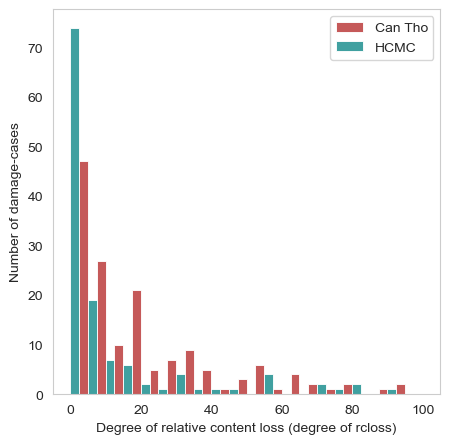

In [72]:
import seaborn as sns
from matplotlib.colors import to_rgba

target = ["Target_relative_contentloss_euro", "Target_businessreduction"]
target = target[0]

target_plot = ["Target_relative_contentloss_euro_categ", "Target_businessreduction_categ"]
target_plot = target_plot[0]


df_hcmc_p = df_hcmc_bothtargets.drop([
  "geometry", 
  "Target_contentloss_euro", "shp_content_value_euro",
  "shp_registered_capital_euro", "shp_sector",
  "overall_problem_house", "shp_business_limitation"
  ], axis=1)
df_cantho_p = df_cantho[df_hcmc_p.columns]


## add col for hue plotting
df_hcmc_p["cityname"] = "HCMC"
df_cantho_p["cityname"] = "Can Tho"

## merge df for plotting
df_merged_p = pd.concat([df_hcmc_p, df_cantho_p], axis=0).reset_index(drop=True)
  
if target ==  "Target_relative_contentloss_euro":
        df_merged_p = df_merged_p.loc[df_merged_p.Target_relative_contentloss_euro > 0.0, : ]

#all_input_p["bage_categ"] = [f'{int(i//10*10)} - {int(i//10*10+10)}' for i in all_input_p["bage"]] # apply modulo operator and multiply by 10
df_merged_p[target_plot] = [ i//5*5 for i in df_merged_p[target]]  # apply modulo operator and multiply by 10
print(df_merged_p[target_plot].value_counts())


## style settings
sns.set_style("whitegrid", {"axes.grid" : False})
fig = plt.figure(figsize=(5, 5))

bins = 50
hue_colors=("teal","firebrick")
alpha=0.2
color_dict = {
        "HCMC": to_rgba(hue_colors[0], alpha), # set transparency for each class independently
        "Can Tho": to_rgba(hue_colors[1], alpha)
    }

legend = True
p = sns.histplot(
        df_merged_p,  
        x=target_plot,
        hue="cityname", stat="count",
        multiple='dodge',
        bins=range(0, 101, 5), 
        palette=color_dict, 
        )

# plt.xlabel("Relative loss due to business interruption (rbred)")
plt.xlabel("Degree of relative content loss (degree of rcloss)")
plt.ylabel("Number of damage-cases")
plt.legend(loc='upper right', labels=['Can Tho', 'HCMC'])
p

fig.get_figure().savefig(OUTPATH_FIGURES / "histo_degree_hcmc_cantho.png", dpi=300, bbox_inches="tight")
# fig.get_figure().savefig(OUTPATH_FIGURES / "histo_rbred_hcmc_cantho.png", dpi=300, bbox_inches="tight")

# df_merged_p.loc[df_merged_p["inundation_duration_h"] > 100, :]# = np.nan
# ## --> businesses [n=7] with inundation > 100h : had much flow experience (ie they are flood-exposured) ,sometimes stornger busienss reduction, and usually only small monthly sales indicating lower content values (their cotnent losses are less or moderate severe)

count   317.00
mean      0.40
std       0.49
min       0.00
25%       0.00
50%       0.00
75%       1.00
max       1.00
Name: Target_relative_contentloss_euro, dtype: float64
count   313.00
mean      0.49
std       0.50
min       0.00
25%       0.00
50%       0.00
75%       1.00
max       1.00
Name: Target_relative_contentloss_euro, dtype: float64


<Figure size 500x500 with 0 Axes>

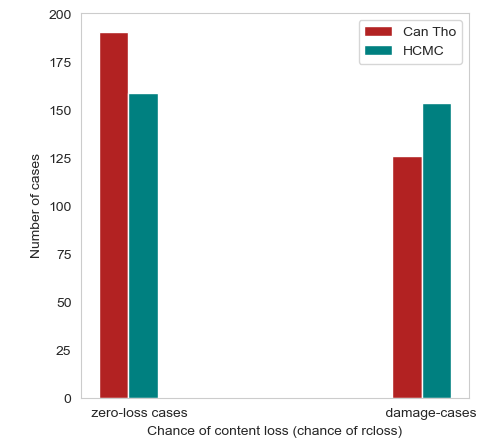

In [73]:
import seaborn as sns
from matplotlib.colors import to_rgba

target = ["Target_relative_contentloss_euro", "Target_businessreduction"]
target = target[0]



df_hcmc_p = df_hcmc_bothtargets.drop([
  "geometry", 
  "Target_contentloss_euro", "shp_content_value_euro",
  "shp_registered_capital_euro", "shp_sector",
  "overall_problem_house", "shp_business_limitation"
  ], axis=1)
df_cantho_p = df_cantho[df_hcmc_p.columns]




df_hcmc_p.loc[df_hcmc_p.Target_relative_contentloss_euro > 0.0, : ] = 1.0 
df_cantho_p.loc[df_cantho_p.Target_relative_contentloss_euro > 0.0, : ] = 1.0 

print(df_hcmc_p[target].describe())
print(df_cantho_p[target].describe())

## style settings
sns.set_style("whitegrid", {"axes.grid" : False})
fig = plt.figure(figsize=(5, 5))


fig, ax = plt.subplots(figsize=(5, 5))
plt.hist((df_hcmc_p[target], df_cantho_p[target]), 2, rwidth=.2, label = ("Can Tho", "HCMC"), alpha=1., color=("firebrick","teal"))
labels = ['', '', '', '', '', '', '', '', '']
labels[1] = "                     zero-loss cases"
labels[6] = "                    damage-cases"
ax.set_xticklabels(labels)

# plt.xlabel("Relative loss due to business interruption (rbred)")
plt.xlabel("Chance of content loss (chance of rcloss)")
plt.ylabel("Number of cases")
plt.legend(loc='upper right', labels=['Can Tho', 'HCMC'])
p

fig.get_figure().savefig(OUTPATH_FIGURES / "histo_chance_hcmc_cantho.png", dpi=300, bbox_inches="tight")



In [74]:
df_merged_p.loc[ (df_merged_p[target] >= 20) & (df_merged_p[target] < 25), :]#.value_counts()

,Target_relative_contentloss_euro,Target_businessreduction,inundation_duration_h,water_depth_cm,contaminations,flowvelocity,flood_experience,bage,b_area,hh_monthly_income_euro,emergency_measures,shp_employees,precautionary_measures_lowcost,precautionary_measures_expensive,resilience,shp_avgmonthly_sale_euro,cityname,Target_relative_contentloss_euro_categ
341,23.37,10.00,5.00,40.00,1.00,0.30,76.00,20.00,118.00,552.40,0.33,1.00,0.00,0.00,2.00,92.10,HCMC,20.00
344,24.32,95.00,2.00,50.00,1.00,0.40,76.00,10.00,350.00,294.60,0.67,1.00,0.50,0.50,3.75,276.20,HCMC,20.00
434,24.79,30.00,2.00,50.00,0.00,0.30,16.00,46.00,91.50,149.60,0.33,2.00,0.25,0.33,3.00,171.00,Can Tho,20.00
523,24.82,60.00,6.00,50.00,0.00,0.40,8.00,26.00,36.00,64.10,0.11,1.00,0.50,0.00,1.00,64.10,Can Tho,20.00
530,24.79,40.00,3.00,25.00,1.00,0.40,76.00,16.00,150.00,149.60,0.33,1.00,0.25,0.00,5.00,171.00,Can Tho,20.00
558,20.76,40.00,6.00,20.00,1.00,0.40,76.00,36.00,72.00,320.60,0.11,2.00,0.50,0.33,1.00,299.30,Can Tho,20.00
671,24.70,0.00,8.00,50.00,1.00,0.30,76.00,16.00,44.00,320.60,0.78,1.00,0.00,0.33,1.00,256.60,Can Tho,20.00


In [92]:
df_cantho.describe()

,Target_businessreduction,shp_sector,flood_experience,flood_type,warning_time_day,effect_emergency_measures,water_depth_cm,inundation_duration_day/month,inundation_duration_hour/day,contaminations,flowvelocity,replaced_cost_e,perception_too_destructive_floods,risk_future_flood,risk_consequents_future_flood,ownership,bage,shp_employees,b_area,floors,builing_elevation,builing_type,Direct_damage,inundation_duration_h,emergency_measures,overall_problem_house,precautionary_measures_lowcost,precautionary_measures_expensive,resilience,building_value_euro,hh_monthly_income_euro,shp_registered_capital_euro,shp_avgmonthly_sale_euro,shp_content_value_euro_obs,Target_contentloss_euro,shp_content_value_euro,shp_content_value_euro_estimated_nocorrection,Target_relative_contentloss_euro
count,313.00,313.00,313.00,279.00,299.00,313.00,313.00,313.00,313.00,313.00,310.00,310.00,313.00,312.00,313.00,312.00,297.00,313.00,310.00,313.00,313.00,313.00,308.00,313.00,313.00,222.00,313.00,313.00,313.00,312.00,312.00,312.00,287.00,310.00,312.00,312.00,312.00,313.00
mean,40.86,2.59,42.23,1.89,3.70,3.71,26.43,8.36,4.33,0.72,0.36,214516.13,4.53,4.65,4.44,1.13,28.95,1.68,96.52,1.45,7.59,3.52,10006253.53,4.33,0.29,3.06,0.30,0.23,2.75,7924.20,268.92,3100.02,475.68,1751.50,53.10,1263.99,5055.98,9.66
std,21.85,1.66,33.20,0.88,5.61,1.35,16.07,4.59,3.41,0.47,0.11,961162.79,1.43,1.40,1.23,0.37,14.15,1.22,166.77,0.66,23.82,0.75,21281879.92,3.41,0.19,0.33,0.25,0.21,1.62,21294.29,283.96,12899.02,1688.91,5918.43,115.44,2857.55,11430.20,17.94
min,0.00,1.00,3.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.10,0.00,1.00,1.00,0.00,0.00,8.00,1.00,9.00,1.00,-100.00,2.00,0.00,1.00,0.00,3.00,0.00,0.00,0.00,0.00,10.70,1068.70,12.80,0.00,0.00,0.00,0.00,0.00
25%,25.00,1.00,8.00,1.00,0.00,3.00,15.00,5.00,2.00,0.00,0.30,0.00,4.00,4.00,4.00,1.00,16.00,1.00,40.00,1.00,0.00,3.00,500000.00,2.00,0.11,3.00,0.00,0.00,1.00,641.30,149.60,1068.70,85.60,85.60,0.00,160.32,641.30,0.00
50%,40.00,2.00,36.00,2.00,3.00,4.00,20.00,7.00,4.00,1.00,0.40,0.00,5.00,5.00,5.00,1.00,26.00,1.00,65.50,1.00,0.00,4.00,3000000.00,4.00,0.33,3.00,0.25,0.33,2.00,3206.20,149.60,1068.70,171.00,256.60,0.00,400.77,1603.10,0.00
75%,50.00,4.00,76.00,3.00,4.00,5.00,40.00,10.00,6.00,1.00,0.40,0.00,6.00,6.00,5.00,1.00,36.00,2.00,100.00,2.00,20.00,4.00,10637500.00,6.00,0.44,3.00,0.50,0.33,4.00,6412.50,320.60,1068.70,384.70,880.65,49.70,1246.88,4987.53,10.61
max,100.00,6.00,76.00,3.00,40.00,6.00,80.00,30.00,24.00,2.00,0.50,12000000.00,6.00,6.00,6.00,3.00,61.00,8.00,2000.00,3.00,100.00,4.00,251000000.00,24.00,0.89,6.00,1.00,0.67,6.00,149625.80,2137.50,149625.80,25650.20,64125.30,993.60,37406.45,149625.80,92.95


In [91]:
## Examine Can Thos micorbusiensses with very high cotnent values
df_cantho.loc[df_cantho.shp_content_value_euro > 10000, :]#["shp_sector"].value_counts()

,Target_businessreduction,shp_sector,flood_experience,flood_type,warning_time_day,effect_emergency_measures,water_depth_cm,inundation_duration_day/month,inundation_duration_hour/day,contaminations,flowvelocity,replaced_cost_e,perception_too_destructive_floods,risk_future_flood,risk_consequents_future_flood,ownership,bage,shp_employees,b_area,floors,builing_elevation,builing_type,Direct_damage,inundation_duration_h,emergency_measures,overall_problem_house,precautionary_measures_lowcost,precautionary_measures_expensive,resilience,building_value_euro,hh_monthly_income_euro,shp_registered_capital_euro,shp_avgmonthly_sale_euro,shp_content_value_euro_obs,Target_contentloss_euro,shp_content_value_euro,shp_content_value_euro_estimated_nocorrection,Target_relative_contentloss_euro
223,80.00,6.00,3.00,3.00,5.00,3.00,0.00,13.00,6.00,1.00,0.50,0.00,4.00,6.00,5.00,1.00,26.00,5.00,64.00,3.00,65.00,4.00,0.00,6.00,0.00,NaN,0.00,0.00,2.00,149625.80,1496.30,14962.60,641.30,23940.20,0.00,12468.82,49875.27,0.00
271,30.00,2.00,8.00,1.00,7.00,4.00,10.00,10.00,5.00,0.00,0.20,0.00,6.00,6.00,5.00,2.00,26.00,7.00,160.00,3.00,20.00,4.00,0.00,5.00,0.00,NaN,0.00,0.33,1.00,149625.80,NaN,3206.20,NaN,0.00,0.00,12468.82,49875.27,0.00
279,5.00,6.00,8.00,NaN,0.00,1.00,10.00,12.00,4.00,0.00,0.30,0.00,5.00,5.00,4.00,2.00,16.00,1.00,80.00,3.00,10.00,4.00,0.00,4.00,0.00,NaN,0.25,0.67,3.00,149625.80,1496.30,6412.50,427.60,2992.50,0.00,12468.82,49875.27,0.00
284,40.00,4.00,8.00,3.00,0.00,3.00,10.00,14.00,4.00,1.00,0.30,0.00,3.00,5.00,5.00,2.00,46.00,4.00,NaN,3.00,20.00,4.00,0.00,4.00,0.44,NaN,0.25,0.33,3.00,149625.80,320.60,32062.70,2137.50,23512.60,0.00,12468.82,49875.27,0.00
285,20.00,4.00,76.00,1.00,2.00,5.00,10.00,10.00,6.00,1.00,0.20,0.00,2.00,5.00,5.00,2.00,16.00,5.00,64.00,1.00,20.00,4.00,5000000.00,6.00,0.67,3.00,0.00,0.33,3.00,149625.80,641.30,3206.20,641.30,9832.60,0.00,37406.45,149625.80,0.00
286,20.00,3.00,76.00,3.00,0.00,4.00,5.00,14.00,8.00,1.00,0.20,0.00,4.00,4.00,5.00,1.00,16.00,1.00,127.20,3.00,40.00,4.00,37000000.00,8.00,0.56,3.00,0.25,0.33,2.00,149625.80,1496.30,32062.70,2137.50,35910.20,248.40,12468.82,49875.27,1.99


**plot predictors**

In [82]:
## unfurtantly no infomration is provided to which business type the numbers of the sector refer

df_cantho_p["shp_sector"].value_counts()


# ## create ratio: 
df_cantho_p["shp_sector"] = df_cantho_p["shp_sector"].replace(
    {
        4:1,
        3:1,    # impl before 
        2:1,    
        1:1,     
        0:0     # not at all  
    }
)

shp_sector
1.00    110
2.00     87
4.00     55
5.00     25
6.00     25
3.00     11
Name: count, dtype: int64

Text(13.333333333333346, 0.5, '')

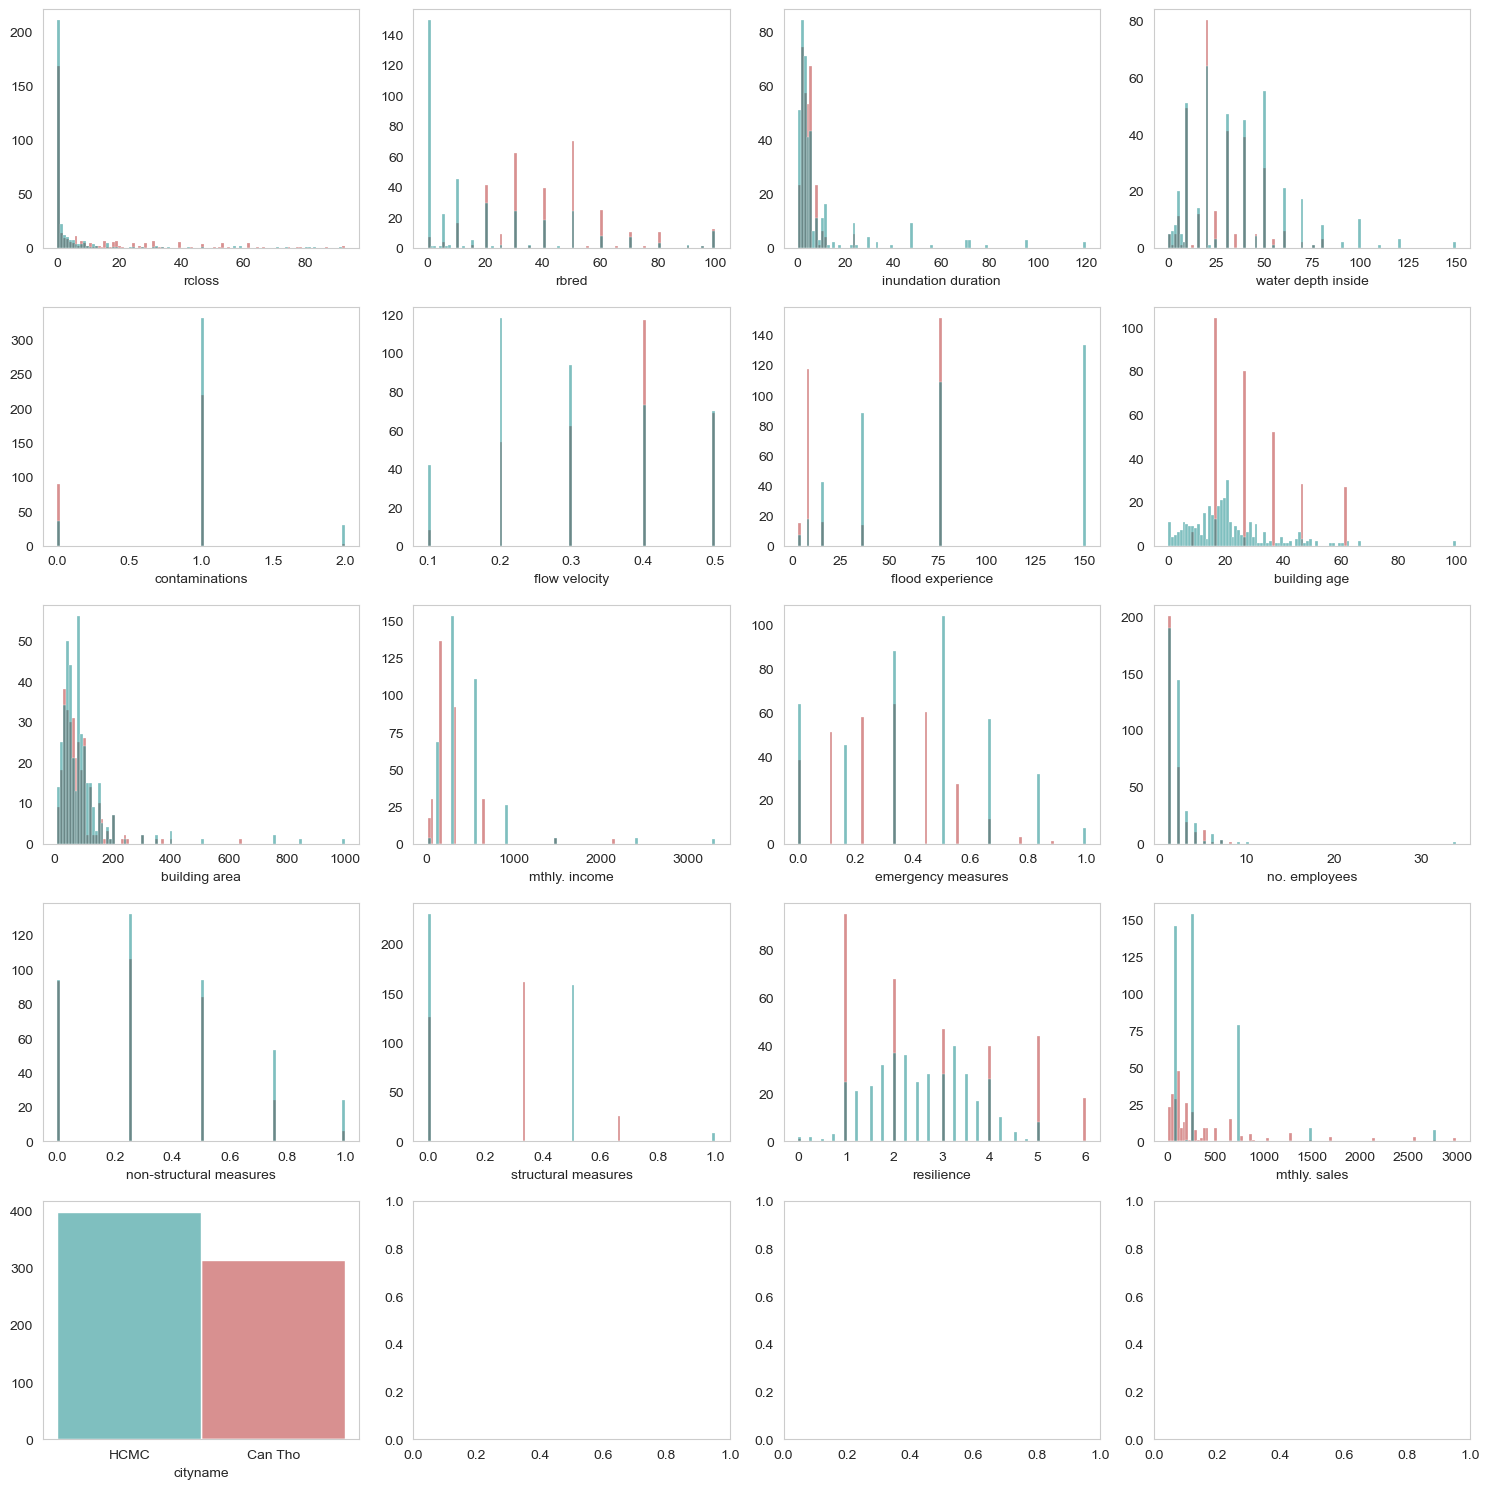

In [83]:
import seaborn as sns
from matplotlib.colors import to_rgba

## prepare HCMC and cantho datasets for plotting
df_hcmc_p =  df_hcmc_bothtargets.drop([
  "geometry", 
  "Target_contentloss_euro", "shp_content_value_euro",
  "shp_registered_capital_euro", "shp_sector",
  "overall_problem_house", "shp_business_limitation"
 # "Target_relative_contentloss_euro", "Target_businessreduction" # plt target extra
  ], axis=1)
df_cantho_p = df_cantho[df_hcmc_p.columns]

## add col for hue plotting
df_hcmc_p["cityname"] = "HCMC"
df_cantho_p["cityname"] = "Can Tho"

## merge df for plotting
df_merged_p = pd.concat([df_hcmc_p, df_cantho_p], axis=0).reset_index(drop=True)
df_merged_p
  
## nice feature labels 
df_merged_p.rename(columns=s.feature_names_plot, inplace=True) 


## style settings
sns.set_style("whitegrid", {"axes.grid" : False})

hue_colors=("teal","firebrick")
alpha=0.3
color_dict = {
        "HCMC": to_rgba(hue_colors[0], alpha), # set transparency for each class independently
        "Can Tho": to_rgba(hue_colors[1], alpha)
    }
numcols = 4
legend = False
bins = 100 # np.linspace(0, 10, 100)

fig, axes = plt.subplots(1+len(df_merged_p.columns)//numcols, numcols, figsize=(15, 15), constrained_layout=True)

## shorten vlaue ranges of few vars for better plotting
df_merged_p["inundation duration"][df_merged_p["inundation duration"] > 120] = np.nan   # 5 cases only in hcmc
df_merged_p["building area"][df_merged_p["building area"] > 1000] = np.nan   # 3 cases only in cantho
df_merged_p["mthly. sales"][df_merged_p["mthly. sales"] > 5000] = np.nan  #  3 cases onl in cantho


## plot histos
for col, ax in zip(df_merged_p.columns, axes.flat):
# for col, ax in zip(df_merged_p[["Target_relative_contentloss_euro","flowvelocity", "bage", "b_area", "inundation_duration_h", "emergency_measures"]].columns, axes.flat):
    p = sns.histplot(
        df_merged_p,  
        x=col, hue="cityname", stat="count",
        bins=bins,
        palette=color_dict, #edgecolors=color_dict, 
        legend=legend,
        # binwidth=.5,
        ax=ax).set_ylabel("")
    # ax.get_yaxis().set_visible(False)
        # ax.set_title(col, size=10)
    plt.tight_layout()
    if legend is True:
        #p.legend(fontsize=10, )  # outside plot: bbox_to_anchor= (1.2,1)
        plt.setp(p.get_legend().get_texts(), fontsize='12')  
        plt.setp(p.get_legend().get_title(), fontsize='15')
# plt.legend(loc="upper right")  # FIXME legend

fig.get_figure().savefig(OUTPATH_FIGURES / "histo_hcmc_cantho.png", dpi=300, bbox_inches="tight")
# sns.move_legend(ax, bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
p

cityname
HCMC       391
Can Tho    313
Name: count, dtype: int64

In [ ]:
# fig.get_figure().savefig(OUTPATH_FIGURES/"/histo_hcmc_cantho.png", dpi=300, bbox_inches="tight")


In [ ]:

# plt.figure(figsize=(58, 28))

# fig, (ax_hist) = plt.subplots(len(df_continous.columns), 1, sharex=False, figsize=(6, 40), constrained_layout=True)#, gridspec_kw={"height_ratios": (.15, .85)})
# #fig, (ax_hist) = plt.subplots(len(df_continous.columns), 2, sharex=False, figsize=(15, 40), constrained_layout=True)#, gridspec_kw={"height_ratios": (.15, .85)})
# #fig.tight_layout()  # alternative for tight_layout() and subplots_adjust(): constrained_layout=True
# fig.suptitle('Distributions of continous explanatory variables')

# for i, c in enumerate(df_continous.columns[:]):
    
#     df_continous_t = df_continous[c][df_continous[c]>0.0]

#     #plt.subplots_adjust(hspace=.2)
#     #sns.boxplot(x=df_continous[c].astype(float), ax=ax_hist[i]).set(title=f"{c}", xlabel=None)
#     #sns.displot(x=df_continous[c].astype(float), binwidth=3, ax=ax_hist[i, 1]).set(title=f"{c}", xlabel=None) # bins=12, stat="percent"
#     if c in ["inundation_duration_h", "b_area", "shp_employees",
#             "shp_building_value_euro", "shp_content_value_euro",
#             "shp_registered_capital_euro" ]:
#         sns.histplot(x=df_continous_t, bins=40,stat='percent', ax=ax_hist[i]).set(title=f"{c}", xlabel=None) # stat="percent"
#         #ax_hist[i].semilogx("log")
#         #ax_hist[i].set_xlim(0, 100000)
#         #log_scale=True- dont use due that it shifts visual distrib, shrinknumber = Scale the width of each bar relative to the binwidth by this factor.
#     else:
#         sns.histplot(x=df_continous_t, bins=10, stat='percent', ax=ax_hist[i]).set(title=f"{c}", xlabel=None) # bins=12, stat="percent"
#         #sns.histplot(x=df_continous[c].astype(float), binwidth=3, stat='count', ax=ax_hist[i, 1]).set(title=f"{c}", xlabel=None) # bins=12, stat="percent"


In [ ]:

# # plot correlations between feature and target
# plt.figure(figsize=(20, 15))

# target = df_candidates_y.iloc[:,0]

# for i, col in enumerate(features_continous):
#     plt.subplot(3, 4, i+1)
#     x = df_all[col]
#     y = target
#     plt.scatter(x, y, marker='x')
#     plt.ylim(0,5000)
#     #plt.xlim(0,10000)  # for columns ending with *_euro$
#     plt.subplots_adjust(wspace=0.5, hspace=0.5)
#     plt.title(col)
#     plt.xlabel(col)
#     plt.ylabel(df_candidates_y.iloc[:,0].name)

## Left overs

In [ ]:
# ## Target relative closs

# # #t[["abs_closs_VND", "shp_content_value_VND"]] = t[["abs_closs_VND", "shp_content_value_VND"]].fillna(0, inplace=True)
# # df_cantho["Target_rcloss"] = df_cantho["abs_closs_VND"] / df_cantho["shp_content_value_VND"]
# # # set all zero-loss cases to 0
# # df_cantho = df_cantho.apply(pd.to_numeric)
# # df_cantho.Target_rcloss[df_cantho.Target_rcloss.isna()] = 0.0

# ## rloss > cv
# print("Records with relative content loss exceding the content values for businesses:", sum(df_cantho.Target_rcloss > 1.0) )
# # t.Target_rcloss[t.Target_rcloss > 1.0]  = 1.0
# # print(all_input_contentloss[all_input_contentloss.Target_relative_contentloss_euro > 0.99 ])
# df_cantho[["abs_closs_VND", "shp_content_value_VND", "Target_rcloss", "Target_bred"]].describe()

# #df_cantho["Target_rcloss"] = df_cantho["abs_closs_VND"] / df_cantho["shp_content_value_VND"]
# df_cantho["Target_rcloss"] = df_cantho["abs_closs_VND"] / df_cantho["shp_content_value_VND_self"]

# # set all zero-loss cases to 0
# df_cantho = df_cantho.apply(pd.to_numeric)
# df_cantho.Target_rcloss[df_cantho.Target_rcloss.isna()] = 0.0

# ## rloss > cv
# print("Records with relative content loss > total content value :", sum(df_cantho.Target_rcloss > 1.0) )

# ## drop these records where rloss > cv
# df_cantho = df_cantho.loc[~(df_cantho.Target_rcloss >= 1.0), :]

# df_cantho[["abs_closs_VND", "shp_content_value_VND_self", "Target_rcloss", "Target_bred"]].describe()


# # Overestimation of CV for small businesses 
# # --> businesses with overestimated Cv is charcterized by low number of employees

# shps_with_overeestimated_cv = df_cantho.loc[df_cantho["shp_content_value_VND"]  <= 2000000.00, :]  # using 25% of busineeses with smallest CV [1.Qunatile]
# shps_with_overeestimated_cv.number_employees.value_counts()  
# ## --> most of the shops with small cv are indeed very small businesses

# # ## drop these records where rloss > cv
# # df_cantho = df_cantho.loc[~(df_cantho.Target_rcloss >= 0.5), :]

# # df_cantho[["abs_closs_VND", "shp_content_value_VND_self", "Target_rcloss", "Target_bred"]].describe()

# # df_cantho.abs_closs_VND.describe()  # max abs loss is 2300 €

# # ## explore cases where rloss > cv
# # tt = t.loc[t.Target_rcloss > 1.0, :]
# # tt.sort_values("abs_closs_VND", ascending=False)


# ## get rloss to similar ratio as for HCMC (rloss=0.3)
# df_cantho =  df_cantho.loc[~(df_cantho.Target_rcloss >= 1.0), :] 
# #df_cantho =  df_cantho.loc[~(df_cantho.Target_rcloss >= .5), :]   # removed ~ 15 records with higher loss ratio than 50%
# df_cantho[["abs_closs_VND", "shp_content_value_VND", "Target_rcloss", "Target_bred"]].describe()

# ## Can Tho
# # Abs Closs: median: 1 €, 3.Quantile: 50 €, mean 74 € , max:  2310 €
# # rloss : median: 0.0 , mean: 0.05,  max: 0.48
# # CV: mean 3340 €, median: 310 € , max: 392.610 € (no inflation corrected)
# ## Bred : mean 40%, median 40%